In [1]:
import pandas as pd

dfp = pd.read_excel(r"C:\Users\lieve\Documents\School\2024 - 2025\Semester 2\Modern Data Analytics [G0Z39a]\Project\cordis-HORIZONprojects-xlsx\project.xlsx")
dfo = pd.read_excel(r"C:\Users\lieve\Documents\School\2024 - 2025\Semester 2\Modern Data Analytics [G0Z39a]\Project\organization.xlsx")

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
import pandas as pd
#dfoutput1 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\project_output_part_1.xlsx")
#dfoutput2 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\project_output_part_2.xlsx")
# Originally, the output was saved in two parts. There ware some missings on the domains.
# This file, has the projects with originally missing domains
# dfoutput3 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\missing_domains_final.xlsx")
# Corrected file 
dfoutput = pd.read_excel(r"C:\Users\lieve\Documents\School\2024 - 2025\Semester 2\Modern Data Analytics [G0Z39a]\Project\project_output.xlsx")

In [3]:
# dfoutput3_uniqueid = dfoutput3['id'].unique()
# df_full_output= pd.concat([dfoutput1, dfoutput2], axis=0, ignore_index=True, verify_integrity=True)
# print(df_full_output)
# Leaves out the projects with originally missing domains
# df_full_output_no_missings = df_full_output[~df_full_output['id'].isin(dfoutput3_uniqueid)]
# The projects with originally missing domains are added to the dataframe with correct domains
# df_full_output = pd.concat([df_full_output_no_missings, dfoutput3], axis=0, ignore_index=True, verify_integrity=True)


In [4]:
# Check if missings domain are gone, issue scientific domains solved
print(dfoutput["scientific_domain"].isna().sum())
print(dfoutput[dfoutput["scientific_domain"].isna()])

1
             id                                          objective  \
4037  101146144  My project spotlights a category of religious ...   

                                            main_topics scientific_domain  \
4037  ['sacred art', 'religious studies', 'history o...               NaN   

              problem_type                expected_impact  sustainability  \
4037  fundamental research  ['societal', 'technological']             0.0   

                                       semantic_summary  
4037  This project delves into the exploration of sa...  


In [5]:
print(dfo.head())

   projectID projectAcronym  organisationID       vatNumber  \
0  101116741            DOE       999981634  NL811383696B01   
1  101163161        IRASTRO       999997736      DK31119103   
2  101163161        IRASTRO       999854855     DE138408327   
3  101163161        IRASTRO       999990267     DE129517720   
4  101160499       In-phase       999874546     ESQ2818014I   

                                                name shortName    SME  \
0                              WAGENINGEN UNIVERSITY        WU  False   
1                                 AARHUS UNIVERSITET        AU  False   
2                               UNIVERSITAET POTSDAM        UP  False   
3  MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...       MPG  False   
4                  UNIVERSIDAD COMPLUTENSE DE MADRID       UCM  False   

  activityType                street postCode  ...  \
0          HES  DROEVENDAALSESTEEG 4  6708 PB  ...   
1          HES     NORDRE RINGGADE 1     8000  ...   
2          HES   AM 

In [6]:
print(dfp.shape)
print(dfo.shape)
# One to one merge dfp and df_full_output
newdf = dfp.merge(dfoutput, on="id")
### One to many merge newdf and dfo, excpect 100249 rows in fulldf
fulldf = newdf.merge(dfo, left_on="id", right_on="projectID", validate="one_to_many")
print(fulldf)

(15341, 20)
(100249, 25)
               id   acronym  status  \
0       101116741       DOE  SIGNED   
1       101163161   IRASTRO  SIGNED   
2       101163161   IRASTRO  SIGNED   
3       101163161   IRASTRO  SIGNED   
4       101160499  In-phase  SIGNED   
...           ...       ...     ...   
100244  101121353       E2i  SIGNED   
100245  101121353       E2i  SIGNED   
100246  101121353       E2i  SIGNED   
100247  101121353       E2i  SIGNED   
100248  101121353       E2i  SIGNED   

                                                    title   startDate  \
0       Digitizing Other Economies: A Comparative Appr...  2024-02-01   
1       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
2       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
3       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
4       Multiscale modelling of aberrant phase transit...  2025-06-01   
...                                                   ...         ..

In [7]:
print(dfoutput["scientific_domain"].isna().sum()) #Still oke
print(fulldf.head())
print(fulldf.info())

1
          id   acronym  status  \
0  101116741       DOE  SIGNED   
1  101163161   IRASTRO  SIGNED   
2  101163161   IRASTRO  SIGNED   
3  101163161   IRASTRO  SIGNED   
4  101160499  In-phase  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
3  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
4  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   

  totalCost_x ecMaxContribution   legalBasis        topics  ...  \
0     1499998           1499998  HORIZON.1.1  ERC-2023-STG  ...   
1    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
2    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
3    12085363          12085363  HORIZON.1.1

In [8]:
# Delete active and nature (empty)
fulldf = fulldf.drop(columns=["active", "nature"])

In [9]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id   acronym  status  \
0  101116741       DOE  SIGNED   
1  101163161   IRASTRO  SIGNED   
2  101163161   IRASTRO  SIGNED   
3  101163161   IRASTRO  SIGNED   
4  101160499  In-phase  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
3  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
4  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   

  totalCost_x ecMaxContribution   legalBasis        topics  ...  \
0     1499998           1499998  HORIZON.1.1  ERC-2023-STG  ...   
1    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
2    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
3    12085363          12085363  HORIZON.1.1  

In [10]:
# To save memory and speed ML training save categorical variables as category datatype
print(fulldf["status"].dtype)
print(fulldf["status"].nbytes)
fulldf["status"] = fulldf["status"].astype("category")
print(fulldf["status"].nbytes)
fulldf["status"].dtype

object
801992
100273


CategoricalDtype(categories=['CLOSED', 'SIGNED', 'TERMINATED'], ordered=False, categories_dtype=object)

In [11]:
# Can be used to include features about the amount of coordinators, participants, ... of a project
print(fulldf["role"].dtype)
print(fulldf["role"].nbytes)
fulldf["role"] = fulldf["role"].astype("category")
print(fulldf["role"].nbytes)
fulldf["role"].dtype

object
801992
100281


CategoricalDtype(categories=['associatedPartner', 'coordinator', 'participant',
                  'thirdParty'],
, ordered=False, categories_dtype=object)

In [12]:
# 15 different levels, maybe add as a feature?
print(fulldf["legalBasis"].dtype)
print(fulldf["legalBasis"].nbytes)
fulldf["legalBasis"] = fulldf["legalBasis"].astype("category")
print(fulldf["legalBasis"].nbytes)
fulldf["legalBasis"].dtype

object
801992
100369


CategoricalDtype(categories=['EURATOM2027', 'HORIZON.1.1', 'HORIZON.1.2', 'HORIZON.1.3',
                  'HORIZON.2.1', 'HORIZON.2.2', 'HORIZON.2.3', 'HORIZON.2.4',
                  'HORIZON.2.5', 'HORIZON.2.6', 'HORIZON.3.1', 'HORIZON.3.2',
                  'HORIZON.3.3', 'HORIZON.4.1', 'HORIZON.4.2'],
, ordered=False, categories_dtype=object)

In [13]:
# too many, only use our topic feature
print(fulldf["topics"].dtype)
print(fulldf["topics"].nbytes)
fulldf["topics"] = fulldf["topics"].astype("category")
print(fulldf["topics"].nbytes)
fulldf["topics"].dtype

object
801992
216842


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SyG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2024-ERA-01-01',
                  'HORIZON-WIDERA-2024-ERA-01-03',
                  'HORIZON-WIDERA-2024-ERA-01-04',
                  'HORIZON-WIDERA-2024-ERA-01-07',
                  'HORIZON-WIDERA-2024-ERA-01-08',
                  'HORIZON-WIDERA-2024-ERA-01-09',
                  'HORIZON-WIDERA-2024-ERA-01-11',
                  'HORIZON-WIDERA-2024-ERA-01-12',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [14]:
# one category, will be dropped as it is not informative
print(fulldf["frameworkProgramme"].dtype)
print(fulldf["frameworkProgramme"].nbytes)
fulldf["frameworkProgramme"] = fulldf["frameworkProgramme"].astype("category")
print(fulldf["frameworkProgramme"].nbytes)
fulldf["frameworkProgramme"].dtype
fulldf = fulldf.drop(columns=["frameworkProgramme"])

object
801992
100257


In [15]:
# Also too many levels, looks like topics (test dubble columns later)
print(fulldf["masterCall"].dtype)
print(fulldf["masterCall"].nbytes)
fulldf["masterCall"] = fulldf["masterCall"].astype("category")
print(fulldf["masterCall"].nbytes)
fulldf["masterCall"].dtype


object
801992
204402


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SYG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2023-ESOF-IBA',
                  'HORIZON-WIDERA-2023-EU-CECR-IBA',
                  'HORIZON-WIDERA-2023-EUCYS-IBA',
                  'HORIZON-WIDERA-2023-RESAVER-IBA',
                  'HORIZON-WIDERA-2023-TALENTS-01',
                  'HORIZON-WIDERA-2023-TALENTS-02',
                  'HORIZON-WIDERA-2024-COST-SGA', 'HORIZON-WIDERA-2024-ERA-01',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [16]:
# Also too many levels, looks like topics and mastercall (test dubble columns later)
print(fulldf["subCall"].dtype)
print(fulldf["subCall"].nbytes)
fulldf["subCall"] = fulldf["subCall"].astype("category")
print(fulldf["subCall"].nbytes)
fulldf["subCall"].dtype

object
801992
204402


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SYG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2023-ESOF-IBA',
                  'HORIZON-WIDERA-2023-EU-CECR-IBA',
                  'HORIZON-WIDERA-2023-EUCYS-IBA',
                  'HORIZON-WIDERA-2023-RESAVER-IBA',
                  'HORIZON-WIDERA-2023-TALENTS-01',
                  'HORIZON-WIDERA-2023-TALENTS-02',
                  'HORIZON-WIDERA-2024-COST-SGA', 'HORIZON-WIDERA-2024-ERA-01',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [17]:
# +30 cat's but looks like there is a lot of subschemes (ERC, EURATOM, HORIZON, EI...)
print(fulldf["fundingScheme"].dtype)
print(fulldf["fundingScheme"].nbytes)
fulldf["fundingScheme"] = fulldf["fundingScheme"].astype("category")
print(fulldf["fundingScheme"].nbytes)
fulldf["fundingScheme"].dtype

object
801992
100561


CategoricalDtype(categories=['CSA', 'EIC', 'EIC-ACC', 'ERC', 'ERC-POC', 'ERC-SYG',
                  'EURATOM-COFUND', 'EURATOM-CSA', 'EURATOM-IA', 'EURATOM-RIA',
                  'HORIZON-AG', 'HORIZON-AG-LS', 'HORIZON-AG-UN',
                  'HORIZON-COFUND', 'HORIZON-CSA', 'HORIZON-EIC',
                  'HORIZON-EIC-ACC', 'HORIZON-EIC-ACC-BF', 'HORIZON-EIT-KIC',
                  'HORIZON-ERC', 'HORIZON-ERC-POC', 'HORIZON-ERC-SYG',
                  'HORIZON-IA', 'HORIZON-JU-CSA', 'HORIZON-JU-IA',
                  'HORIZON-JU-RIA', 'HORIZON-PCP', 'HORIZON-RIA',
                  'HORIZON-TMA-MSCA-Cofund-D', 'HORIZON-TMA-MSCA-Cofund-P',
                  'HORIZON-TMA-MSCA-DN', 'HORIZON-TMA-MSCA-DN-ID',
                  'HORIZON-TMA-MSCA-DN-JD', 'HORIZON-TMA-MSCA-PF-EF',
                  'HORIZON-TMA-MSCA-PF-GF', 'HORIZON-TMA-MSCA-SE', 'IA',
                  'MSCA-PF', 'RIA'],
, ordered=False, categories_dtype=object)

In [18]:
# possible feature if we want to do something with the originizations activity types
print(fulldf["activityType"].dtype)
print(fulldf["activityType"].nbytes)
fulldf["activityType"] = fulldf["activityType"].astype("category")
print(fulldf["activityType"].nbytes)
fulldf["activityType"].dtype

object
801992
100289


CategoricalDtype(categories=['HES', 'OTH', 'PRC', 'PUB', 'REC'], ordered=False, categories_dtype=object)

In [19]:
# Maybe if we want to group variables in region and then check influence on funding? Or put on a worldmap?
# Can also use the column nutscode, EU's nomenclature for deviding in statistical regions, see next cell
print(fulldf["country"].dtype)
print(fulldf["country"].nbytes)
fulldf["country"] = fulldf["country"].astype("category")
print(fulldf["country"].nbytes)
fulldf["country"].dtype

object
801992
201866


CategoricalDtype(categories=['AD', 'AE', 'AF', 'AI', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU',
                  ...
                  'US', 'UY', 'UZ', 'VA', 'VE', 'VN', 'XK', 'ZA', 'ZM', 'ZW'],
, ordered=False, categories_dtype=object)

In [20]:
# A lot, better to group on country level maybe?
print(fulldf["nutsCode"].dtype)
print(fulldf["nutsCode"].nbytes)
fulldf["nutsCode"] = fulldf["nutsCode"].astype("category")
print(fulldf["nutsCode"].nbytes)
fulldf["nutsCode"].dtype

object
801992
212130


CategoricalDtype(categories=['AD', 'AE', 'AF', 'AI', 'AL', 'AL012', 'AL022', 'AM', 'AO',
                  'AR',
                  ...
                  'US', 'UY', 'UZ', 'VA', 'VE', 'VN', 'XK', 'ZA', 'ZM', 'ZW'],
, ordered=False, categories_dtype=object)

In [21]:
print(fulldf["main_topics"].dtype)
print(fulldf["main_topics"].nbytes)
fulldf["main_topics"] = fulldf["main_topics"].astype("category")
print(fulldf["main_topics"].nbytes)
fulldf["main_topics"].dtype

object
801992
322666


CategoricalDtype(categories=['["Alzheimer's Disease", 'Genetics', 'Neurodegeneration', 'PET Imaging']',
                  '["Alzheimer's Disease", 'Neurodegeneration', 'Drug Development']',
                  '["Alzheimer's Disease", 'Point of Care Testing', 'Cognitive Impairment']',
                  '["Alzheimer's disease diagnostics", 'Blood-based biomarkers']',
                  '["Alzheimer's disease diagnostics", 'plasma biomarkers', 'digital cognitive tests']',
                  '["Alzheimer's disease pathogenesis", 'immune system interactions', 'bioactive lipids']',
                  '["Alzheimer's disease pathology", 'Neuroinflammation', 'Microglia subpopulations']',
                  '["Alzheimer's disease research", 'Gene therapy', 'Nanocarriers']',
                  '["Alzheimer's disease", 'Amyloid-beta protein', 'Neuroinflammation', 'Neurodegeneration']',
                  '["Alzheimer's disease", 'Nasu-Hakola disease', 'microglia dysfunction', 'TREM2 expression']',
      

In [22]:
# Still a lot, maybe group further like 'urban planning', 'urban studies' as urban
print(fulldf["scientific_domain"].dtype)
print(fulldf["scientific_domain"].nbytes)
fulldf[" scientific_domain"] = fulldf["scientific_domain"].astype("category")
print(fulldf["scientific_domain"].nbytes)
fulldf[" scientific_domain"].dtype

object
801992
801992


CategoricalDtype(categories=['aeronautics', 'aerospace engineering',
                  'agricultural science', 'anthropology', 'archaeology',
                  'architecture', 'artificial intelligence',
                  'arts and humanities', 'astronomy', 'astrophysics',
                  'biochemistry', 'biology', 'biomedical', 'biophysics',
                  'biotechnology', 'business and innovation',
                  'chemical engineering', 'chemistry', 'climate science',
                  'cognitive science', 'computer science', 'confidential',
                  'cultural studies', 'earth sciences', 'ecology', 'economics',
                  'education', 'energy', 'engineering',
                  'environmental engineering', 'environmental science',
                  'food science', 'genetics', 'geology', 'geophysics',
                  'geoscience', 'health science', 'healthcare', 'history',
                  'information technology', 'interdisciplinary', 'law',
                 

In [23]:
# Some with upper case some without, convert this to capitalized categories
print(fulldf["problem_type"].dtype)
print(fulldf["problem_type"].nbytes)
fulldf["problem_type"] = fulldf["problem_type"].astype("category")
print(fulldf["problem_type"].nbytes)
fulldf["problem_type"].dtype

object
801992
100329


CategoricalDtype(categories=['Applied Research', 'Applied research', 'Confidential',
                  'Fundamental Research', 'Fundamental research',
                  'Translational Research', 'Translational research',
                  'applied research', 'fundamental research',
                  'translational research'],
, ordered=False, categories_dtype=object)

In [24]:
# some with 1, some 2 ... maybe make 1 or try to have all 2 or 3 for example? (the more the more categories)
print(fulldf["expected_impact"].dtype)
print(fulldf["expected_impact"].nbytes)
fulldf["expected_impact"] = fulldf["expected_impact"].astype("category")
print(fulldf["expected_impact"].nbytes)
fulldf["expected_impact"].dtype

object
801992
100841


CategoricalDtype(categories=['Confidential', 'Societal',
                  '['Societal', 'Economic', 'Environmental']',
                  '['Societal', 'Economic']',
                  '['Societal', 'Environmental', 'Economic']',
                  '['Societal', 'Environmental']',
                  '['Societal', 'Technological', 'Economic']',
                  '['Societal', 'Technological', 'Environmental', 'Economic']',
                  '['Societal', 'Technological', 'Environmental']',
                  '['Societal', 'Technological']', '['Societal']',
                  '['Technological', 'Economic']',
                  '['Technological', 'Environmental']',
                  '['Technological', 'Societal']',
                  '['economic', 'environmental']', '['economic', 'societal']',
                  '['economic', 'technological', 'societal']', '['economic']',
                  '['environmental', 'economic']',
                  '['environmental', 'societal']',
                  '['env

In [25]:
# Drop the columns we will probably not use for prediction
# Geographical columns can be used later if we want to do geographical clustering for example
fulldf = fulldf.drop(columns=["acronym", "title", "totalCost_x", "topics", "objective_x", "rcn_x", "grantDoi", "contentUpdateDate_x", \
                              "projectID", "projectAcronym", "organisationID", "vatNumber", "name", "shortName", "street", "postCode", \
                              "city", "geolocation", "organizationURL", "contactForm","contentUpdateDate_y", "rcn_y", "totalCost_y", \
                              "ecContribution", "netEcContribution", "ecSignatureDate", "masterCall", "subCall", " scientific_domain"])

In [26]:
print(fulldf["scientific_domain"].isna().sum()) # Still ok
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

3
          id  status   startDate     endDate ecMaxContribution   legalBasis  \
0  101116741  SIGNED  2024-02-01  2029-01-31           1499998  HORIZON.1.1   
1  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
2  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
3  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
4  101160499  SIGNED  2025-06-01  2030-05-31           1489128  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0  ['

In [27]:
fulldf["ecMaxContribution"] = fulldf["ecMaxContribution"].str.replace(',', '.', regex=False).astype(float)

In [28]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id  status   startDate     endDate  ecMaxContribution   legalBasis  \
0  101116741  SIGNED  2024-02-01  2029-01-31          1499998.0  HORIZON.1.1   
1  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
2  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
3  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
4  101160499  SIGNED  2025-06-01  2030-05-31          1489128.0  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0

In [29]:
# Missings on SME, this gives a false to MSE when it is missings
fulldf["SME"] = fulldf["SME"].astype(bool)

In [30]:
fulldf["SME"] = fulldf["SME"].astype(int)

In [31]:
fulldf["startDate"] = pd.to_datetime(fulldf["startDate"])
fulldf["endDate"] = pd.to_datetime(fulldf["endDate"])

In [32]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id  status  startDate    endDate  ecMaxContribution   legalBasis  \
0  101116741  SIGNED 2024-02-01 2029-01-31          1499998.0  HORIZON.1.1   
1  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
2  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
3  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
4  101160499  SIGNED 2025-06-01 2030-05-31          1489128.0  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0  ['digital 

In [33]:
# Still missings on other own col's for these three projects. Leave them out for now
import missingno as msno
sorted_NAs = msno.nullity_sort(fulldf, sort='ascending')
print(sorted_NAs.head(100))

              id  status  startDate    endDate  ecMaxContribution  \
46924  101149703  SIGNED 2024-09-01 2026-08-31          195914.88   
80782  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80783  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80760  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80762  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
...          ...     ...        ...        ...                ...   
2825   101178074  SIGNED 2024-11-01 2028-10-31        11939105.26   
3327   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3337   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3616   101177556  SIGNED 2025-01-01 2027-12-31         3944966.79   
3992   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   

        legalBasis           fundingScheme  \
46924  HORIZON.1.2  HORIZON-TMA-MSCA-PF-EF   
80782  HORIZON.2.5           HORIZON-JU-IA   
80783  HORIZON.2.5           HORI

In [34]:
# missings on all new col's: 101149703 (195914.88 funding, 1 organization), 101101973 (37875973.46 funding, 89 organizations) 101041246
# (1395888.00 funding, 1 organization)
# Drop these two for now
fulldf_C = fulldf[~fulldf["id"].isin([101149703, 101101973])]

In [35]:
# When country or nutscode our NA python thinks its a NAN so have to change this behaviour
# Also missing on all: 101041246 (1395888.00, 1 organization)
# Missing only on scientific domain: 101120060, 101129910, 101113553, 101100494, 101081937 (initial missings, fixed later in cell 3)
# for organization order 14 of id 101120060: no nutscode and lots of missings for adress (col's dropped earlier)

sorted_NAs = msno.nullity_sort(fulldf_C, sort='ascending')
print(sorted_NAs.head(20))

              id  status  startDate    endDate  ecMaxContribution  \
78651  101041246  SIGNED 2022-09-01 2027-08-31         1395888.00   
11716  101114611  SIGNED 2023-06-01 2026-05-31         5356611.76   
3337   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3616   101177556  SIGNED 2025-01-01 2027-12-31         3944966.79   
3992   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
3986   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
4309   101070278  SIGNED 2022-09-01 2025-08-31         2826500.00   
4489   101182027  SIGNED 2025-01-01 2028-12-31         5998801.25   
4521   101135505  SIGNED 2024-06-01 2027-05-31        10244330.61   
4752   101135062  SIGNED 2024-06-01 2029-05-31         9659285.15   
5005   101060790  SIGNED 2022-07-01 2025-06-30         2636607.50   
5055   101112407  SIGNED 2023-06-01 2026-05-31         4751936.41   
5171   101135150  SIGNED 2024-06-01 2027-11-30         4695750.00   
5289   101061083  SIGNED 2022-07-0

In [36]:
fulldf_C = fulldf_C[~fulldf_C["id"].isin([101041246])]
# Ensure that 'NA' in 'country' or 'nutsCode' columns is treated as a string value and not as NaN (can't seem to fix that)
sorted_NAs = msno.nullity_sort(fulldf_C, sort='ascending')
print(sorted_NAs.head(20))

              id  status  startDate    endDate  ecMaxContribution  \
11716  101114611  SIGNED 2023-06-01 2026-05-31         5356611.76   
3327   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3337   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3616   101177556  SIGNED 2025-01-01 2027-12-31         3944966.79   
3992   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
3986   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
4309   101070278  SIGNED 2022-09-01 2025-08-31         2826500.00   
4489   101182027  SIGNED 2025-01-01 2028-12-31         5998801.25   
4521   101135505  SIGNED 2024-06-01 2027-05-31        10244330.61   
4752   101135062  SIGNED 2024-06-01 2029-05-31         9659285.15   
5005   101060790  SIGNED 2022-07-01 2025-06-30         2636607.50   
5055   101112407  SIGNED 2023-06-01 2026-05-31         4751936.41   
5171   101135150  SIGNED 2024-06-01 2027-11-30         4695750.00   
5289   101061083  SIGNED 2022-07-0

In [37]:
# List of all projects than above with a missing scientific_domain
missing_scientific_domain = fulldf_C[fulldf_C["scientific_domain"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on main_topics (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["main_topics"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on expected_impact (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["expected_impact"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on sustainability (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["sustainability"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on problem_type (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["problem_type"].isna()]
print(missing_scientific_domain["id"].unique())

[101146144]
[]
[]
[]
[]


In [38]:
# Still some missing values on: fundingScheme, 101113553 looks like it has no fundingscheme (reliable to include?)
# Organisation involved: ORGANISATION EUROPEENNE NUCLEAIRE, so maybe a EURATOM fundingsscheme?
missing_scientific_domain = fulldf_C[fulldf_C["fundingScheme"].isna()]
print(missing_scientific_domain["id"].unique())

[101113553]


In [39]:
# 24 missings on activitytype
missing_scientific_domain = fulldf_C[fulldf_C["activityType"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))


              id  order
11716  101114611     17
26370  101120397      7
26372  101120397      8
26374  101120397      4
34510  101084651     11
48561  101129889     10
48567  101129889      7
48569  101129889      4
59606  101094546     19
59608  101094546     10
59612  101094546     15
59614  101094546      7
59619  101094546      9
59621  101094546     20
59624  101094546     21
61055  101105967      3
88261  101131469      7
88262  101131469      8
88263  101131469      4
88264  101131469     10
88265  101131469      2
88267  101131469      6
88268  101131469      9
99511  190183494      1
24


In [40]:
# 13 missings on country, mostly bcs of NA, Change manually in excell file via formula if not fixable via python?
# 5 missings after fixing NA to NAM
# These missings were: 101114611, 101178250, 101081581, 101063992, 101065058  
# Fixed based on location company or the cityname -> no missings left (needed for feature engineering further on)
missing_scientific_domain = fulldf_C[fulldf_C["country"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

Empty DataFrame
Columns: [id, order]
Index: []
0


In [41]:
# Also because of NA but more with real missings 
# Lot after fixing problem NA, so would give problems if we want to use it in a geographical clustering
missing_scientific_domain = fulldf_C[fulldf_C["nutsCode"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

              id  order
343    101096781      6
425    101121171      2
1731   101129646      4
1812   101180091      2
2332   101092242      2
...          ...    ...
96162  101126688     14
96580  101081347      8
98532  101186252      4
98536  101186252      5
98537  101186252      2

[270 rows x 2 columns]
270


In [42]:
# Left out the projects with missings on self made col's col's
print(fulldf_C.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100157 entries, 0 to 100248
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  100157 non-null  int64         
 1   status              100157 non-null  category      
 2   startDate           100157 non-null  datetime64[ns]
 3   endDate             100157 non-null  datetime64[ns]
 4   ecMaxContribution   100157 non-null  float64       
 5   legalBasis          100157 non-null  category      
 6   fundingScheme       100156 non-null  category      
 7   objective_y         100157 non-null  object        
 8   main_topics         100157 non-null  category      
 9   scientific_domain   100154 non-null  object        
 10  problem_type        100157 non-null  category      
 11  expected_impact     100157 non-null  category      
 12  sustainability      100157 non-null  float64       
 13  semantic_summary    100157 non-nul

In [43]:
print(fulldf_C.dtypes)

id                             int64
status                      category
startDate             datetime64[ns]
endDate               datetime64[ns]
ecMaxContribution            float64
legalBasis                  category
fundingScheme               category
objective_y                   object
main_topics                 category
scientific_domain             object
problem_type                category
expected_impact             category
sustainability               float64
semantic_summary              object
SME                            int64
activityType                category
country                     category
nutsCode                    category
order                          int64
role                        category
endOfParticipation              bool
dtype: object


# Start preparing dataset, feature engineering


In [44]:
fulldf= fulldf_C.copy()

In [45]:
import math
fulldf["problem_type"] = fulldf["problem_type"].astype("object")
fulldf["expected_impact"] = fulldf["expected_impact"].astype("object")
fulldf["sustainability"] = fulldf["sustainability"].astype("object")
fulldf["fundingScheme"] = fulldf["fundingScheme"].astype("object")
fulldf = fulldf.reset_index(drop=True)
for i in range(len(fulldf)):
    if not isinstance(fulldf["problem_type"][i], str):
        fulldf["problem_type"][i] = "no problem"
    if not isinstance(fulldf["expected_impact"][i], str):
        fulldf["expected_impact"][i] = "no impact"
    if not isinstance(fulldf["fundingScheme"][i], str):
        fulldf["fundingScheme"][i] = "unknown scheme"
    if math.isnan(fulldf["sustainability"][i]):
        fulldf["sustainability"][i] = 0

C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\3536201230.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fulldf["fundingScheme"][i] = "unknown scheme"
C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\3536201230.py:13: SettingWithCo

In [46]:
fulldf

,id,status,startDate,endDate,ecMaxContribution,legalBasis,fundingScheme,objective_y,main_topics,scientific_domain,...,expected_impact,sustainability,semantic_summary,SME,activityType,country,nutsCode,order,role,endOfParticipation
0,101116741,SIGNED,2024-02-01,2029-01-31,1499998.0,HORIZON.1.1,HORIZON-ERC,"How do longstanding, primarily non-industrial,...","['digital technologies', 'economic diversity',...",anthropology,...,"['societal', 'economic']",0.0,This project explores how non-industrial socie...,0,HES,NL,NL221,1,coordinator,False
1,101163161,SIGNED,2025-08-01,2031-07-31,12085363.0,HORIZON.1.1,HORIZON-ERC-SYG,The James Webb Space Telescope (JWST) has ushe...,"['Astrochemistry', 'Quantum Dynamics', 'Infrar...",physics,...,"['technological', 'societal']",0.0,The project aims to revolutionize astrochemist...,0,HES,DK,DK042,2,participant,False
2,101163161,SIGNED,2025-08-01,2031-07-31,12085363.0,HORIZON.1.1,HORIZON-ERC-SYG,The James Webb Space Telescope (JWST) has ushe...,"['Astrochemistry', 'Quantum Dynamics', 'Infrar...",physics,...,"['technological', 'societal']",0.0,The project aims to revolutionize astrochemist...,0,HES,DE,DE404,3,participant,False
3,101163161,SIGNED,2025-08-01,2031-07-31,12085363.0,HORIZON.1.1,HORIZON-ERC-SYG,The James Webb Space Telescope (JWST) has ushe...,"['Astrochemistry', 'Quantum Dynamics', 'Infrar...",physics,...,"['technological', 'societal']",0.0,The project aims to revolutionize astrochemist...,0,REC,DE,DE212,1,coordinator,False
4,101160499,SIGNED,2025-06-01,2030-05-31,1489128.0,HORIZON.1.1,HORIZON-ERC,The spatiotemporal organization of the cell ma...,"['biophysics', 'molecular biology', 'computati...",biology,...,"['societal', 'technological']",0.0,The project 'In-phase' aims to develop a compu...,0,HES,ES,ES300,1,coordinator,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100152,101121353,SIGNED,2023-08-01,2027-03-31,1286125.0,HORIZON.2.3,HORIZON-RIA,Engage2innovate (E2i) will investigate and add...,"['security research', 'social innovation', 'hu...",computer science,...,"['societal', 'technological']",0.0,Engage2innovate (E2i) focuses on addressing ba...,0,PUB,UK,UKD33,5,associatedPartner,False
100153,101121353,SIGNED,2023-08-01,2027-03-31,1286125.0,HORIZON.2.3,HORIZON-RIA,Engage2innovate (E2i) will investigate and add...,"['security research', 'social innovation', 'hu...",computer science,...,"['societal', 'technological']",0.0,Engage2innovate (E2i) focuses on addressing ba...,0,OTH,DE,DEA23,4,participant,False
100154,101121353,SIGNED,2023-08-01,2027-03-31,1286125.0,HORIZON.2.3,HORIZON-RIA,Engage2innovate (E2i) will investigate and add...,"['security research', 'social innovation', 'hu...",computer science,...,"['societal', 'technological']",0.0,Engage2innovate (E2i) focuses on addressing ba...,0,PUB,DE,DE929,3,participant,False
100155,101121353,SIGNED,2023-08-01,2027-03-31,1286125.0,HORIZON.2.3,HORIZON-RIA,Engage2innovate (E2i) will investigate and add...,"['security research', 'social innovation', 'hu...",computer science,...,"['societal', 'technological']",0.0,Engage2innovate (E2i) focuses on addressing ba...,0,HES,IL,IL,2,participant,False


In [47]:
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer

# MultiLabelBinarizer for main_topics with grouping
mlb_topics = MultiLabelBinarizer(sparse_output=True)
fulldf['main_topics'] = fulldf['main_topics'].astype('object')
fulldf['main_topics'] = fulldf['main_topics'].apply(
    lambda x: [str(i).lower() for i in (literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)]
    if isinstance(x, (str, list)) else []
)

# Calculate frequency of each topic
all_topics = [topic for sublist in fulldf['main_topics'] for topic in sublist]
topic_counts = pd.Series(all_topics).value_counts()
total_count = len(all_topics)

# Define a frequency threshold (e.g., 0.1%)
threshold = 0.001
infrequent_topics = topic_counts[topic_counts / total_count < threshold].index.tolist()

# Replace infrequent topics with "other"
fulldf['main_topics'] = fulldf['main_topics'].apply(
    lambda topics: [topic if topic not in infrequent_topics else "other" for topic in topics]
)

# Apply MultiLabelBinarizer
topic_labels = mlb_topics.fit_transform(fulldf['main_topics'])
topic_columns = [f'topic_{label.replace(' ', '_').replace('-', '_')}' for label in mlb_topics.classes_]
topic_df = pd.DataFrame.sparse.from_spmatrix(topic_labels, columns=topic_columns)

In [48]:
fulldf = pd.concat([fulldf, topic_df], axis=1)

In [49]:
# MultiLabelBinarizer for expected_impact
mlb_impact = MultiLabelBinarizer(sparse_output=True)

# Function to safely parse and lowercase the impact strings
def parse_impact(x):
    if isinstance(x, str):
        x = x.strip() # Remove any leading/trailing whitespace
        if x.startswith('[') and x.endswith(']'):
            try:
                # Safely evaluate string representation of a list
                return [str(i).lower() for i in literal_eval(x)]
            except (ValueError, SyntaxError):
                # Fallback if literal_eval fails (e.g., malformed list string)
                return [x.lower()] if x else []
        elif x == 'Confidential':
            return [] # Treat 'Confidential' as no specific impact
        else:
            # For single words like 'societal' or 'technological'
            return [x.lower()] if x else []
    elif isinstance(x, list):
        # If it's already a list, just lowercase elements
        return [str(i).lower() for i in x]
    else:
        return [] # Handle any other unexpected types

fulldf['expected_impact_processed'] = fulldf['expected_impact'].apply(parse_impact)

# Fit and transform with MultiLabelBinarizer
impact_labels = mlb_impact.fit_transform(fulldf['expected_impact_processed'])

# Create column names, ensuring they are valid and descriptive
impact_columns = [f'impact_{label.replace(" ", "_").replace("-", "_").lower()}' for label in mlb_impact.classes_]
impact_df = pd.DataFrame.sparse.from_spmatrix(impact_labels, columns=impact_columns)

In [50]:
fulldf = pd.concat([fulldf, impact_df], axis=1)

In [51]:
import datetime

fulldf["startDate"] = fulldf["startDate"].astype("object")
fulldf["endDate"] = fulldf["endDate"].astype("object")
lengths = []
for i in range(len(fulldf)):
    start_date = fulldf.loc[i, "startDate"]
    end_date = fulldf.loc[i, "endDate"]
    
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    if isinstance(end_date, str):
        end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    
    length = (end_date - start_date).days
    lengths.append(length)

fulldf["project_length_days"] = lengths

In [52]:
print(fulldf.head())
print(fulldf.info())

          id  status            startDate              endDate  \
0  101116741  SIGNED  2024-02-01 00:00:00  2029-01-31 00:00:00   
1  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
2  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
3  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
4  101160499  SIGNED  2025-06-01 00:00:00  2030-05-31 00:00:00   

   ecMaxContribution   legalBasis    fundingScheme  \
0          1499998.0  HORIZON.1.1      HORIZON-ERC   
1         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
2         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
3         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
4          1489128.0  HORIZON.1.1      HORIZON-ERC   

                                         objective_y  \
0  How do longstanding, primarily non-industrial,...   
1  The James Webb Space Telescope (JWST) has ushe...   
2  The James Webb Space Telescope (JWST) has ushe...   
3  The James Webb Space Telescope (JWST) has ushe...  

In [53]:
print(fulldf["country"].unique())

['NL', 'DK', 'DE', 'ES', 'EL', ..., 'NI', 'GM', 'KW', 'NC', 'SD']
Length: 171
Categories (171, object): ['AD', 'AE', 'AF', 'AI', ..., 'XK', 'ZA', 'ZM', 'ZW']


In [54]:
country_to_continent = {
    'AD': 'Europe', 'AE': 'Asia', 'AF': 'Asia', 'AG': 'North America',
    'AI': 'North America', 'AL': 'Europe', 'AM': 'Asia', 'AO': 'Africa',
    'AQ': 'Antarctica', 'AR': 'South America', 'AS': 'Oceania', 'AT': 'Europe',
    'AU': 'Oceania', 'AW': 'North America', 'AX': 'Europe', 'AZ': 'Asia',
    'BA': 'Europe', 'BB': 'North America', 'BD': 'Asia', 'BE': 'Europe',
    'BF': 'Africa', 'BG': 'Europe', 'BH': 'Asia', 'BI': 'Africa',
    'BJ': 'Africa', 'BL': 'North America', 'BM': 'North America', 'BN': 'Asia',
    'BO': 'South America', 'BQ': 'North America', 'BR': 'South America', 'BS': 'North America',
    'BT': 'Asia', 'BV': 'Antarctica', 'BW': 'Africa', 'BY': 'Europe',
    'BZ': 'North America', 'CA': 'North America', 'CC': 'Asia', 'CD': 'Africa',
    'CF': 'Africa', 'CG': 'Africa', 'CH': 'Europe', 'CI': 'Africa',
    'CK': 'Oceania', 'CL': 'South America', 'CM': 'Africa', 'CN': 'Asia',
    'CO': 'South America', 'CP': 'North America', 'CR': 'North America', 'CU': 'North America',
    'CV': 'Africa', 'CW': 'North America', 'CX': 'Asia', 'CY': 'Europe',
    'CZ': 'Europe', 'DE': 'Europe', 'DJ': 'Africa', 'DK': 'Europe',
    'DM': 'North America', 'DO': 'North America', 'DZ': 'Africa', 'EC': 'South America',
    'EE': 'Europe', 'EG': 'Africa', 'EH': 'Africa', "EL": "Europe", 'ER': 'Africa',
    'ES': 'Europe', 'ET': 'Africa', 'FI': 'Europe', 'FJ': 'Oceania',
    'FK': 'South America', 'FM': 'Oceania', 'FO': 'Europe', 'FR': 'Europe',
    'GA': 'Africa', 'GD': 'North America', 'GE': 'Asia', 'GF': 'South America',
    'GG': 'Europe', 'GH': 'Africa', 'GI': 'Europe', 'GL': 'North America',
    'GM': 'Africa', 'GN': 'Africa', 'GP': 'North America', 'GQ': 'Africa',
    'GS': 'Antarctica', 'GT': 'North America', 'GU': 'Oceania', 'GW': 'Africa',
    'GY': 'South America', 'HK': 'Asia', 'HM': 'Antarctica', 'HN': 'North America',
    'HR': 'Europe', 'HT': 'North America', 'HU': 'Europe', 'ID': 'Asia',
    'IE': 'Europe', 'IL': 'Asia', 'IM': 'Europe', 'IN': 'Asia',
    'IO': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'IS': 'Europe',
    'IT': 'Europe', 'JE': 'Europe', 'JM': 'North America', 'JO': 'Asia',
    'JP': 'Asia', 'KE': 'Africa', 'KG': 'Asia', 'KH': 'Asia',
    'KI': 'Oceania', 'KM': 'Africa', 'KN': 'North America', 'KP': 'Asia',
    'KR': 'Asia', 'KW': 'Asia', 'KY': 'North America', 'KZ': 'Asia',
    'LA': 'Asia', 'LB': 'Asia', 'LC': 'North America', 'LI': 'Europe',
    'LK': 'Asia', 'LR': 'Africa', 'LS': 'Africa', 'LT': 'Europe',
    'LU': 'Europe', 'LV': 'Europe', 'LY': 'Africa', 'MA': 'Africa',
    'MC': 'Europe', 'MD': 'Europe', 'ME': 'Europe', 'MF': 'North America',
    'MG': 'Africa', 'MH': 'Oceania', 'MK': 'Europe', 'ML': 'Africa',
    'MM': 'Asia', 'MN': 'Asia', 'MO': 'Asia', 'MP': 'Oceania',
    'MQ': 'North America', 'MR': 'Africa', 'MS': 'North America', 'MT': 'Europe',
    'MU': 'Africa', 'MV': 'Asia', 'MW': 'Africa', 'MX': 'North America',
    'MY': 'Asia', 'MZ': 'Africa', 'NC': 'Oceania', 'NE': 'Africa',
    'NF': 'Oceania', 'NG': 'Africa', 'NI': 'North America', 'NL': 'Europe',
    'NO': 'Europe', 'NP': 'Asia', 'NR': 'Oceania', 'NU': 'Oceania',
    'NZ': 'Oceania', 'OM': 'Asia', 'PA': 'North America', 'PE': 'South America',
    'PF': 'Oceania', 'PG': 'Oceania', 'PH': 'Asia', 'PK': 'Asia',
    'PL': 'Europe', 'PM': 'North America', 'PN': 'Oceania', 'PR': 'North America',
    'PS': 'Asia', 'PT': 'Europe', 'PW': 'Oceania', 'PY': 'South America',
    'QA': 'Asia', 'RE': 'Africa', 'RO': 'Europe', 'RS': 'Europe',
    'RU': 'Europe', 'RW': 'Africa', 'SA': 'Asia', 'SB': 'Oceania',
    'SC': 'Africa', 'SD': 'Africa', 'SE': 'Europe', 'SG': 'Asia',
    'SH': 'Africa', 'SI': 'Europe', 'SJ': 'Europe', 'SK': 'Europe',
    'SL': 'Africa', 'SM': 'Europe', 'SN': 'Africa', 'SO': 'Africa',
    'SR': 'South America', 'SS': 'Africa', 'ST': 'Africa', 'SV': 'North America',
    'SX': 'North America', 'SY': 'Asia', 'SZ': 'Africa', 'TC': 'North America',
    'TD': 'Africa', 'TF': 'Antarctica', 'TG': 'Africa', 'TH': 'Asia',
    'TJ': 'Asia', 'TK': 'Oceania', 'TL': 'Asia', 'TM': 'Asia',
    'TN': 'Africa', 'TO': 'Oceania', 'TR': 'Asia', 'TT': 'North America',
    'TV': 'Oceania', 'TW': 'Asia', 'TZ': 'Africa', 'UA': 'Europe',
    'UG': 'Africa', 'UK': 'Europe', 'UM': 'Oceania', 'US': 'North America',
    'UY': 'South America', 'UZ': 'Asia', 'VA': 'Europe', 'VC': 'North America',
    'VE': 'South America', 'VG': 'North America', 'VI': 'North America', 'VN': 'Asia',
    'VU': 'Oceania', 'WF': 'Oceania', 'WS': 'Oceania', 'XK': 'Europe',
    'YE': 'Asia', 'YT': 'Africa', 'ZA': 'Africa', 'ZM': 'Africa',
    'ZW': 'Africa'
}
fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))

In [55]:
print(fulldf["continent"].value_counts())

continent
Europe           94295
Asia              2667
North America     1377
Africa            1163
South America      401
Oceania            246
Unknown              8
Name: count, dtype: int64


In [56]:
unique_continents_per_id = fulldf.groupby('id')['continent'].agg(lambda x: list(x.unique()))
fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)

In [57]:
# --- MultiLabelBinarizer for continents (similar to impact) ---
mlb_continents = MultiLabelBinarizer(sparse_output=True)

# Function to safely parse and lowercase the continent strings
def parse_continent_data(x):
    if isinstance(x, str):
        x = x.strip()
        if x.startswith('[') and x.endswith(']'):
            try:
                # Safely evaluate string representation of a list
                return [str(i).lower() for i in literal_eval(x)]
            except (ValueError, SyntaxError):
                # Fallback if literal_eval fails (e.g., malformed list string)
                # If a single string like "europe", treat it as a list of one
                return [x.lower()] if x else []
        else:
            # For single words like 'europe' or 'north america'
            return [x.lower()] if x else []
    elif isinstance(x, list):
        # If it's already a list, just lowercase elements
        return [str(i).lower() for i in x]
    # Handle NaN values explicitly if they could be present and you want a 'nan' category
    # If a NaN should be treated as an empty list, then:
    elif pd.isna(x): # Check for pandas NaN
        return []
    else:
        return [] # Handle any other unexpected types

# Apply the parsing function to your raw continent column
# Replace 'your_raw_continent_column_name' with the actual column name in fulldf
fulldf['continents_processed'] = fulldf['all_continents'].apply(parse_continent_data)

# Fit and transform with MultiLabelBinarizer
# This is where mlb_continents learns its classes_
continent_labels = mlb_continents.fit_transform(fulldf['continents_processed'])

# Create column names
# Ensure these names match the format used in your prediction app for UI selection
continents_columns = [f'continent_{label.replace(" ", "_").replace("-", "_").lower()}' for label in mlb_continents.classes_]
continents_df = pd.DataFrame.sparse.from_spmatrix(continent_labels, columns=continents_columns)

fulldf = pd.concat([fulldf, continents_df], axis=1)

In [58]:
fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')

In [59]:
fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')

In [60]:
fulldf = fulldf.sort_values(by = "id")

In [61]:
print(fulldf.head(100))

              id  status            startDate              endDate  \
78838  101039048  SIGNED  2022-02-01 00:00:00  2027-01-31 00:00:00   
78906  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78905  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78904  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78612  101039066  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
...          ...     ...                  ...                  ...   
78732  101039683  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
78496  101039692  SIGNED  2022-09-01 00:00:00  2027-08-31 00:00:00   
78837  101039706  SIGNED  2022-12-01 00:00:00  2027-11-30 00:00:00   
78873  101039711  SIGNED  2022-09-01 00:00:00  2027-08-31 00:00:00   
78750  101039712  SIGNED  2022-07-01 00:00:00  2027-06-30 00:00:00   

       ecMaxContribution   legalBasis fundingScheme  \
78838          1496205.0  HORIZON.1.1   HORIZON-ERC   
78906          1499150.0  HORIZON.1.1   HORIZON-E

In [62]:
fulldf["proportion_MSE"] = fulldf["number_of_small_and_medium_orgs"] / fulldf['number_of_organizations']

In [63]:
df_MSE = fulldf[["SME", 'number_of_organizations', 'number_of_small_and_medium_orgs', "proportion_MSE"]]
print(df_MSE.head(70))

       SME  number_of_organizations  number_of_small_and_medium_orgs  \
78838    0                        1                                0   
78906    0                        3                                0   
78905    0                        3                                0   
78904    0                        3                                0   
78612    0                        1                                0   
...    ...                      ...                              ...   
78615    0                        1                                0   
78729    0                        1                                0   
78895    0                        1                                0   
78533    0                        1                                0   
78929    0                        2                                0   

       proportion_MSE  
78838             0.0  
78906             0.0  
78905             0.0  
78904             0.0  
78612          

In [64]:
df_MSE.to_csv(r".\MSE.csv")

In [65]:
fulldf = fulldf.drop(columns=["SME", "nutsCode", "activityType", "endOfParticipation", "order", "role"])

In [66]:
# Keep one row per project (all rows from the same project should all be the same by now, expect n=15338 (15341 if problem missings solved))
fulldf = fulldf.drop_duplicates(subset=["id"], keep="first")

# Controleer het resultaat
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)

              id  status            startDate              endDate  \
78838  101039048  SIGNED  2022-02-01 00:00:00  2027-01-31 00:00:00   
78906  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78612  101039066  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
78764  101039090  SIGNED  2022-04-01 00:00:00  2027-03-31 00:00:00   
78527  101039098  SIGNED  2023-03-01 00:00:00  2028-02-29 00:00:00   

       ecMaxContribution   legalBasis fundingScheme  \
78838          1496205.0  HORIZON.1.1   HORIZON-ERC   
78906          1499150.0  HORIZON.1.1   HORIZON-ERC   
78612          1482050.0  HORIZON.1.1   HORIZON-ERC   
78764          1495000.0  HORIZON.1.1    HORIZON-AG   
78527          1458688.0  HORIZON.1.1   HORIZON-ERC   

                                             objective_y  \
78838  The recent detection of the coherent elastic n...   
78906  The transition from foraging to farming repres...   
78612  The capacity of future forests to support biod...   
78764  C

In [67]:
print(fulldf.columns)

Index(['id', 'status', 'startDate', 'endDate', 'ecMaxContribution',
       'legalBasis', 'fundingScheme', 'objective_y', 'main_topics',
       'scientific_domain',
       ...
       'continent_africa', 'continent_asia', 'continent_europe',
       'continent_north_america', 'continent_oceania',
       'continent_south_america', 'continent_unknown',
       'number_of_organizations', 'number_of_small_and_medium_orgs',
       'proportion_MSE'],
      dtype='object', length=150)


In [68]:
fulldf.to_excel(r".\test.xlsx")

In [2]:
#import pandas as pd
#fulldf = pd.read_excel(r".\test.xlsx")

In [68]:
# Very high range, 46 594 to 549 442 000   -> maybe we will have to do some outlier detection?
pd.set_option('display.float_format', '{:.2f}'.format)
print(fulldf["ecMaxContribution"].astype(int).describe())

count       15338.00
mean      2851686.10
std       8314247.49
min         46594.00
25%        211754.00
50%       1808235.50
75%       2999995.75
max     549442000.00
Name: ecMaxContribution, dtype: float64


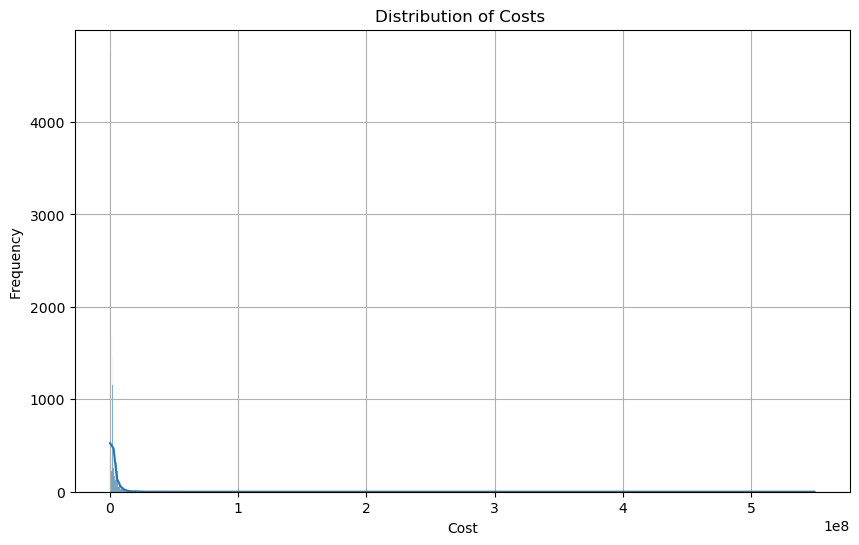

In [69]:
# Again very big outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

(15284, 150)


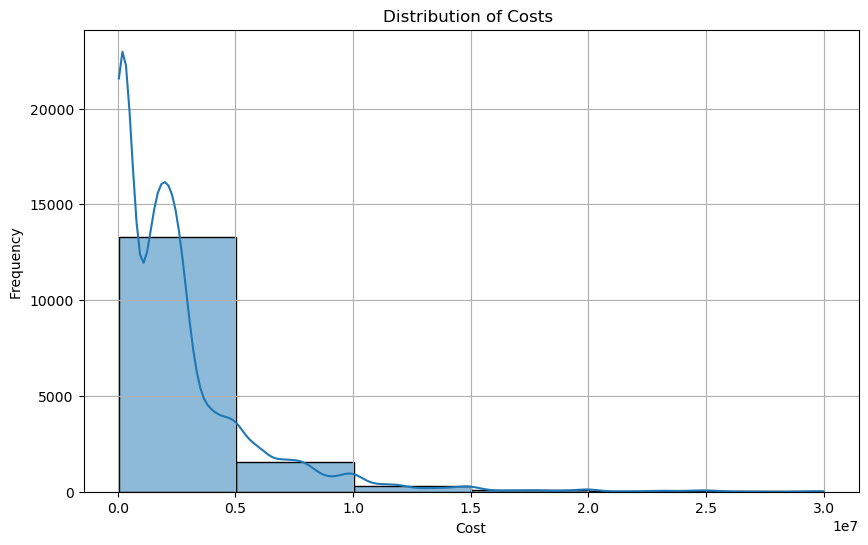

In [70]:
# Only keep projects funding < 30 000 000 for now
# only 54 projects with funding > 30 000 000
# Biggest Majority of the projects have funding < 5000000
fulldf30 = fulldf[fulldf["ecMaxContribution"] < 30000000]
print(fulldf30.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf30['ecMaxContribution'], binwidth=5000000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

(13272, 150)


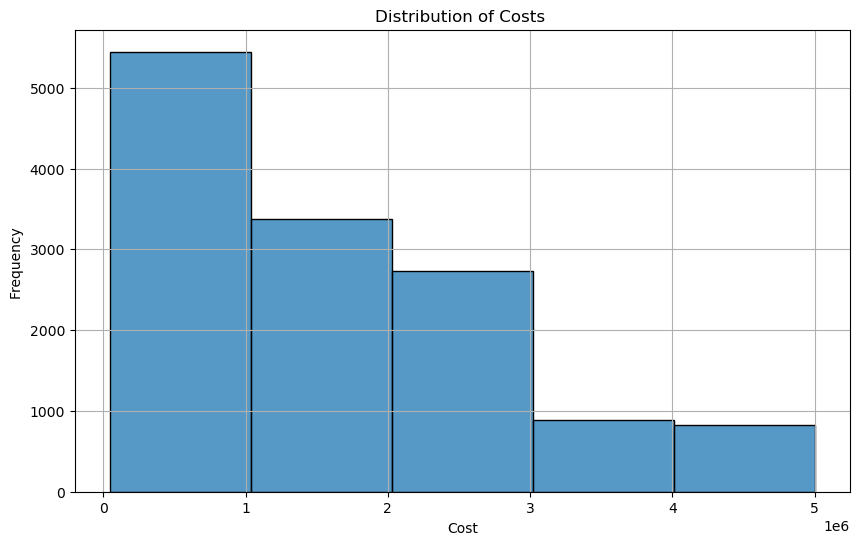

In [71]:
# Only keep projects funding < 5000000 for now
# Seems to be better for the ML training
fulldf5 = fulldf[fulldf["ecMaxContribution"] < 5000000]
print(fulldf5.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf5['ecMaxContribution'], binwidth=1000000)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

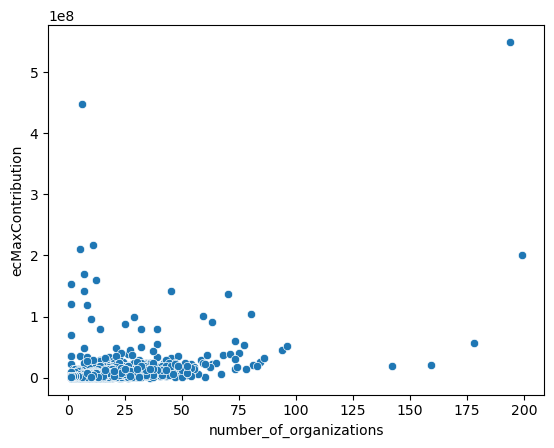

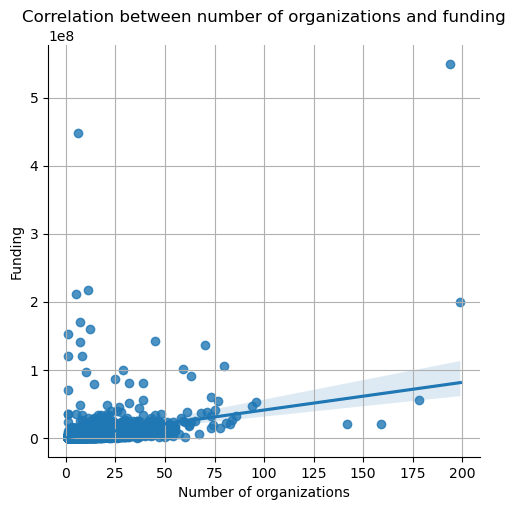

                         ecMaxContribution  number_of_organizations
ecMaxContribution                     1.00                     0.45
number_of_organizations               0.45                     1.00


In [72]:

# Check corr, ecMaxContribution and number_of_organizations
sns.scatterplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number of organizations and funding")
plt.xlabel("Number of organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["ecMaxContribution", "number_of_organizations"]].corr())

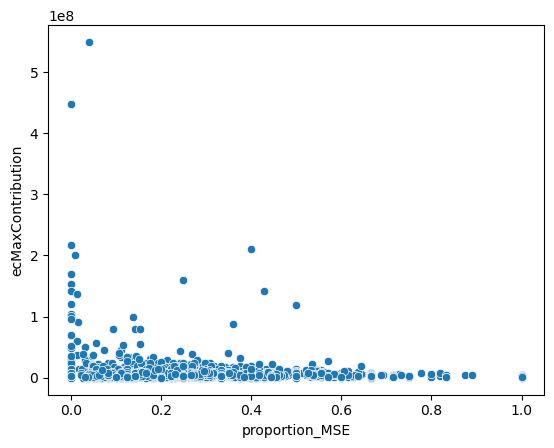

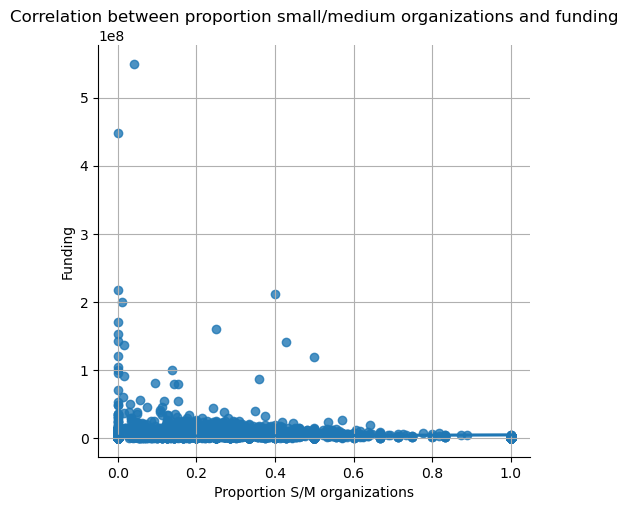

                         proportion_MSE  number_of_organizations
proportion_MSE                     1.00                     0.14
number_of_organizations            0.14                     1.00


In [73]:
# Check corr, ecMaxContribution and proportion_MSE, smaller cor (0.13 for small dataset (0.14 full df), expected negative sign)
sns.scatterplot(x="proportion_MSE", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="proportion_MSE", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between proportion small/medium organizations and funding")
plt.xlabel("Proportion S/M organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["proportion_MSE", "number_of_organizations"]].corr())

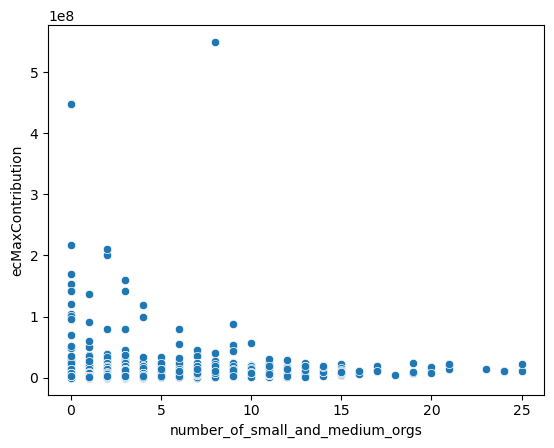

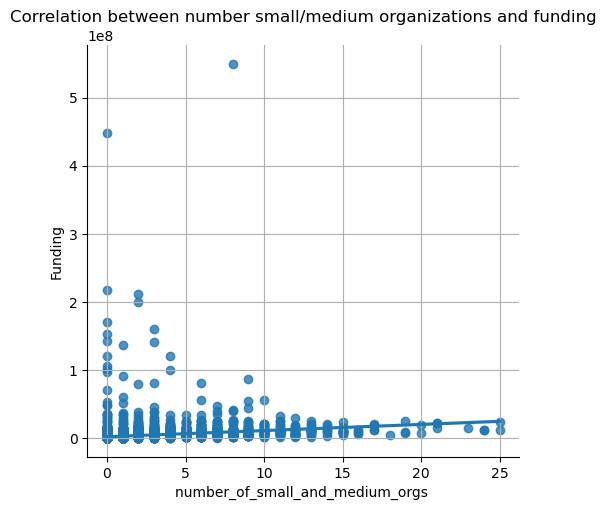

                                 number_of_small_and_medium_orgs  \
number_of_small_and_medium_orgs                             1.00   
ecMaxContribution                                           0.25   

                                 ecMaxContribution  
number_of_small_and_medium_orgs               0.25  
ecMaxContribution                             1.00  


In [74]:
# Check corr, ecMaxContribution and number of MSE, less corr than number of organizations (as expected). 
# Since proportion SME seems not to be very informative, we can drop it
sns.scatterplot(x="number_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number small/medium organizations and funding")
plt.xlabel("number_of_small_and_medium_orgs ")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["number_of_small_and_medium_orgs", "ecMaxContribution"]].corr())

# All these plots indicate mean>median, meaning very big outliers to the right and so a right skewed dataset

In [75]:
fulldf.columns

Index(['id', 'status', 'startDate', 'endDate', 'ecMaxContribution',
       'legalBasis', 'fundingScheme', 'objective_y', 'main_topics',
       'scientific_domain',
       ...
       'continent_africa', 'continent_asia', 'continent_europe',
       'continent_north_america', 'continent_oceania',
       'continent_south_america', 'continent_unknown',
       'number_of_organizations', 'number_of_small_and_medium_orgs',
       'proportion_MSE'],
      dtype='object', length=150)

C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\2604259879.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None)


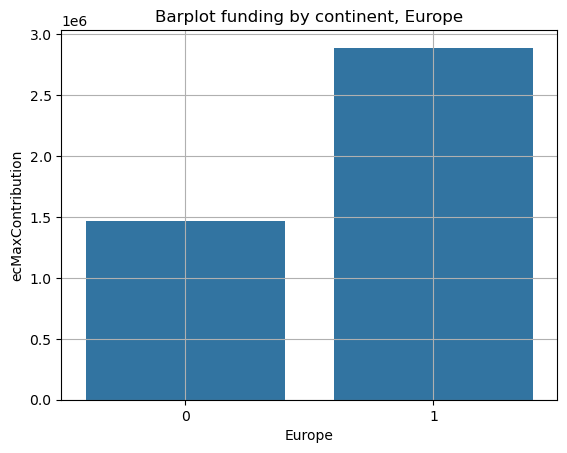

C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\2604259879.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None, estimator="median")


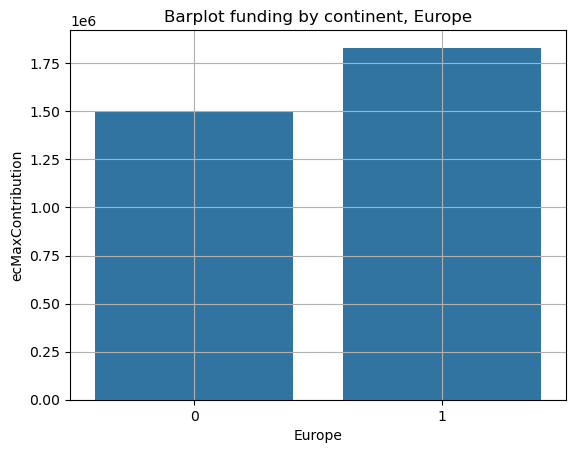

In [76]:
# Mean difference of 190 000, small dataset
# No median difference, outliers to the right in Europe case
sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\1681066833.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None)


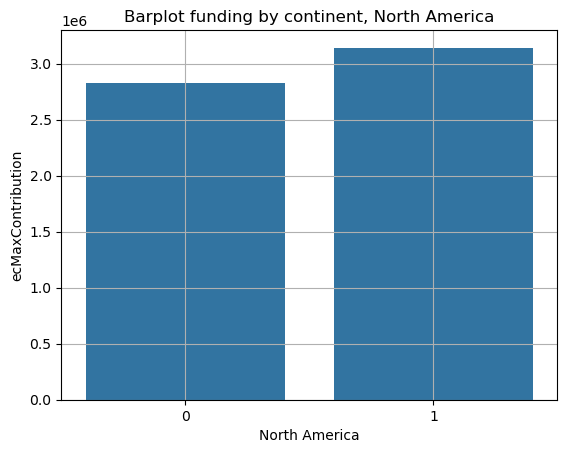

C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\1681066833.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None, estimator="median")


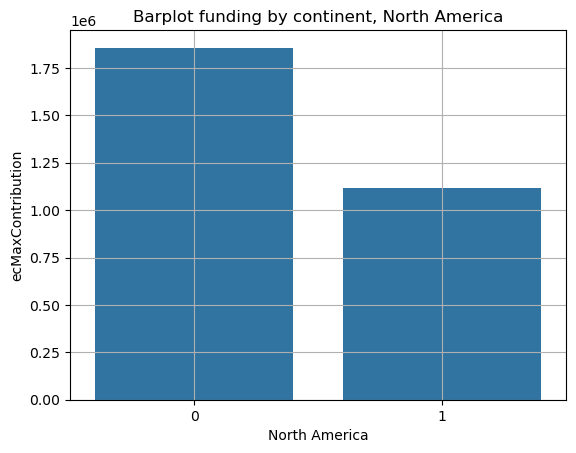

In [77]:
# Mean difference of 190 000, small dataset
# No median difference, outliers to the right in Europe case
sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

In [78]:
# See code Kian for all continents

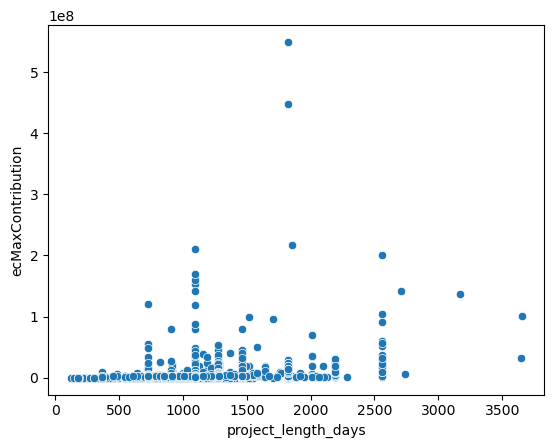

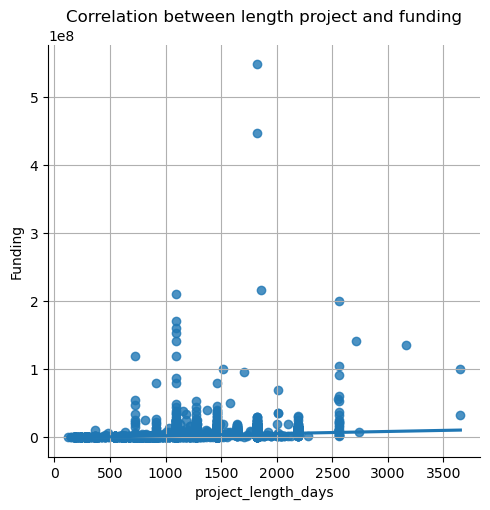

                     project_length_days  ecMaxContribution
project_length_days                 1.00               0.18
ecMaxContribution                   0.18               1.00


In [79]:
# Seems to be a correlation between project length and funding
sns.scatterplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between length project and funding")
plt.xlabel("project_length_days")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["project_length_days", "ecMaxContribution"]].corr())

In [80]:
# prepare for ML 
drop_cols = ['id','status', 'startDate', 'endDate', 'objective_y','main_topics', 'number_of_small_and_medium_orgs','proportion_MSE', \
            'problem_type', 'expected_impact', 'semantic_summary', 'expected_impact_processed', 'country', 'all_continents', 'continent', 'continents_processed']


fulldf = fulldf.drop(columns=drop_cols)
print(fulldf.columns)

Index(['ecMaxContribution', 'legalBasis', 'fundingScheme', 'scientific_domain',
       'sustainability', 'topic_6g_networks', 'topic_additive_manufacturing',
       'topic_agriculture', 'topic_agroecology', 'topic_ai',
       ...
       'impact_translational', 'project_length_days', 'continent_africa',
       'continent_asia', 'continent_europe', 'continent_north_america',
       'continent_oceania', 'continent_south_america', 'continent_unknown',
       'number_of_organizations'],
      dtype='object', length=134)


In [81]:
fulldf["sustainability"] = fulldf["sustainability"].astype(int)

# Model Building

In [82]:
print(fulldf["ecMaxContribution"].describe())

count       15338.00
mean      2851686.37
std       8314247.50
min         46594.00
25%        211754.88
50%       1808235.50
75%       2999996.12
max     549442000.00
Name: ecMaxContribution, dtype: float64


In [83]:
X = fulldf.drop(columns=["ecMaxContribution"])
y = fulldf["ecMaxContribution"]

In [84]:
print(X.columns.tolist())

['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability', 'topic_6g_networks', 'topic_additive_manufacturing', 'topic_agriculture', 'topic_agroecology', 'topic_ai', 'topic_aquaculture', 'topic_artificial_intelligence', 'topic_automation', 'topic_aviation', 'topic_battery_technology', 'topic_big_data', 'topic_biodiversity', 'topic_biodiversity_conservation', 'topic_bioeconomy', 'topic_bioinformatics', 'topic_biomarkers', 'topic_biotechnology', 'topic_cancer_research', 'topic_capacity_building', 'topic_circular_economy', 'topic_climate_change', 'topic_climate_change_adaptation', 'topic_climate_change_mitigation', 'topic_climate_neutrality', 'topic_climate_resilience', 'topic_clinical_trials', 'topic_collaboration', 'topic_cultural_heritage', 'topic_cybersecurity', 'topic_data_analytics', 'topic_data_management', 'topic_data_science', 'topic_data_sharing', 'topic_decarbonisation', 'topic_deep_learning', 'topic_democracy', 'topic_digital_technologies', 'topic_digital_tools', '

In [85]:
import pandas as pd

# Assuming fulldf is your DataFrame

# 1. Get a summary of column dtypes
print("DataFrame dtypes:")
print(fulldf.info())

# 2. Specifically look at 'object' type columns for lists
print("\nChecking 'object' columns for list data:")
object_columns = fulldf.select_dtypes(include='object').columns

for col in object_columns:
    # Use .apply() with a lambda to check if any element in the column is a list
    # .any() returns True if at least one element is True
    if fulldf[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list(s).")
    # You might also want to check for other sequence types if applicable
    # elif fulldf[col].apply(lambda x: isinstance(x, (tuple, set))).any():
    #     print(f"Column '{col}' contains tuple/set(s).")

print("\nFinished checking column types.")

DataFrame dtypes:
<class 'pandas.core.frame.DataFrame'>
Index: 15338 entries, 78838 to 99808
Columns: 134 entries, ecMaxContribution to number_of_organizations
dtypes: Sparse[int64, 0](127), category(1), float64(1), int64(3), object(2)
memory usage: 1.7+ MB
None

Checking 'object' columns for list data:

Finished checking column types.


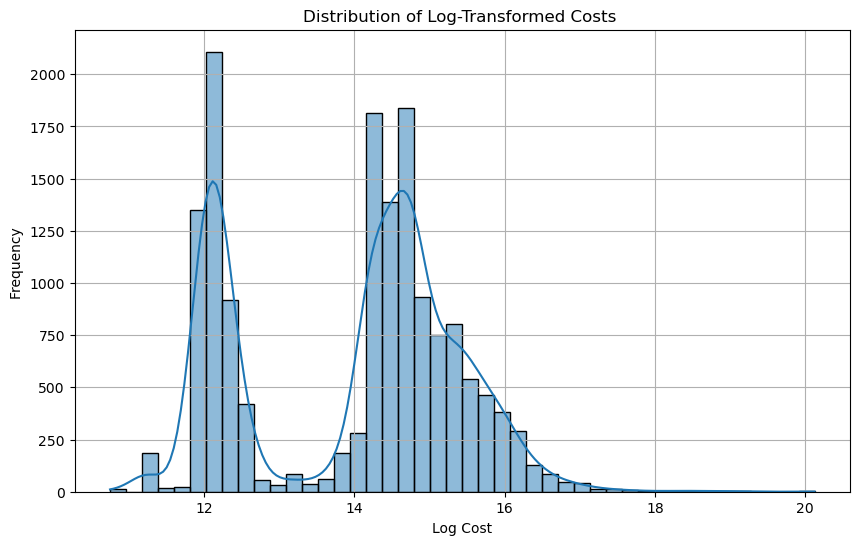

In [86]:
import numpy as np

# Perform log transformation on the target variable
fulldf["log_ecMaxContribution"] = np.log(fulldf["ecMaxContribution"])
# Check the distribution of the log-transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['log_ecMaxContribution'], kde=True)
plt.title("Distribution of Log-Transformed Costs ")
plt.xlabel("Log Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib # To save/load your model and transformers

# Assuming fulldf is already defined and loaded
# Make sure 'ecMaxContribution' and 'log_ecMaxContribution' are columns in fulldf

# Separate features (X) and log-transformed target (y_log)
X = fulldf.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y_log = fulldf["log_ecMaxContribution"] # y is on the log scale
y_original = fulldf["ecMaxContribution"] # Keep original for backtransformation evaluation

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability']
numerical_features = ['project_length_days', 'number_of_organizations'] + topic_columns + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Model Selection and Training (Random Forest as an example)
model = RandomForestRegressor(random_state=42)

# Create a pipeline to combine preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

# --- CORRECTED SPLITTING ---
# Split X, y_log, and y_original all at once to ensure perfect alignment
X_train, X_test, y_train_log, , y_train_original, y_test_original = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42
)
# --- END CORRECTED SPLITTING ---

# Train the model (using log-transformed y)
pipeline.fit(X_train, y_train_log)

# Model Evaluation on LOG scale
y_pred_log = pipeline.predict(X_test)

mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("--- Evaluation on LOG Scale ---")
print(f'Mean Squared Error (Log): {mse_log:.4f}')
print(f'Root Mean Squared Error (Log): {rmse_log:.4f}')
print(f'R-squared (Log): {r2_log:.4f}')

# --- Backtransform predictions to original scale ---
y_pred_original_scale = np.exp(y_pred_log) # Using np.exp() for inverse log transformation

# Model Evaluation on ORIGINAL scale
mse_original = mean_squared_error(y_test_original, y_pred_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original_scale)
mae_original = mean_absolute_error(y_test_original, y_pred_original_scale) # MAE is often more interpretable on backtransformed scale

print("\n--- Evaluation on ORIGINAL Scale (Backtransformed) ---")
print(f'Mean Squared Error (Original): {mse_original:.2f}')
print(f'Root Mean Squared Error (Original): {rmse_original:.2f}')
print(f'Mean Absolute Error (Original): {mae_original:.2f}') # Consider MAE as well
print(f'R-squared (Original): {r2_original:.2f}')


# --- Save the trained components ---
joblib.dump(pipeline, 'prediction_pipeline.joblib')
# Assuming mlb_topics, mlb_impact, mlb_continents, infrequent_topics, topic_columns, continents_columns are defined
# and loaded from your previous script context. If they are used for feature creation, ensure they are passed along.
# joblib.dump(mlb_topics, 'mlb_topics.joblib')
# joblib.dump(mlb_impact, 'mlb_impact.joblib')
# joblib.dump(mlb_continents, 'mlb_continents.joblib')
# joblib.dump(infrequent_topics, 'infrequent_topics.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib') # Save feature order
print("\nModel components saved successfully!")

# --- END OF TRAINING & SAVING SCRIPT ---

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


--- Evaluation on LOG Scale ---
Mean Squared Error (Log): 0.0970
Root Mean Squared Error (Log): 0.3114
R-squared (Log): 0.9536

--- Evaluation on ORIGINAL Scale (Backtransformed) ---
Mean Squared Error (Original): 26143239610024.17
Root Mean Squared Error (Original): 5113046.02
Mean Absolute Error (Original): 897775.67
R-squared (Original): 0.30

Model components saved successfully!


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


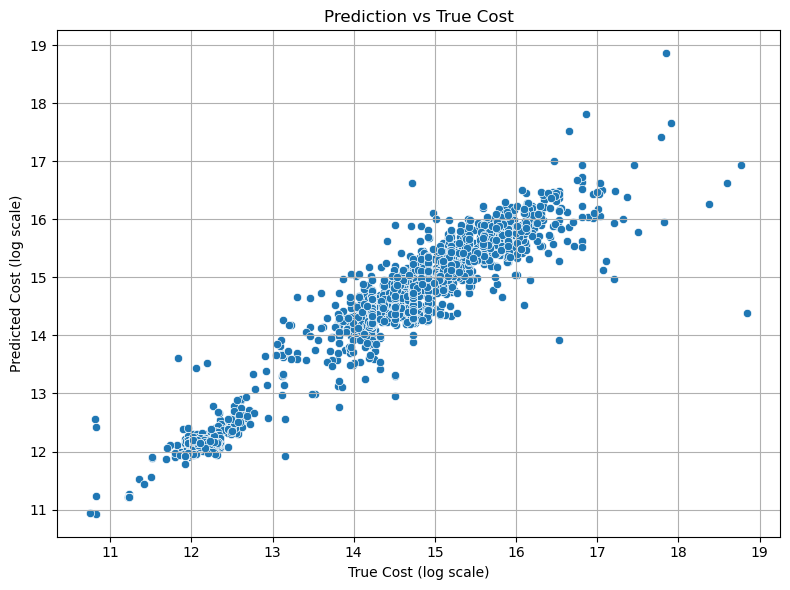

Correlation between True Cost and Predicted Cost: 0.98


In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_log, y=y_pred_log)
plt.xlabel("True Cost (log scale)")
plt.ylabel("Predicted Cost (log scale)")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test_log, y_pred_log)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\1957497103.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


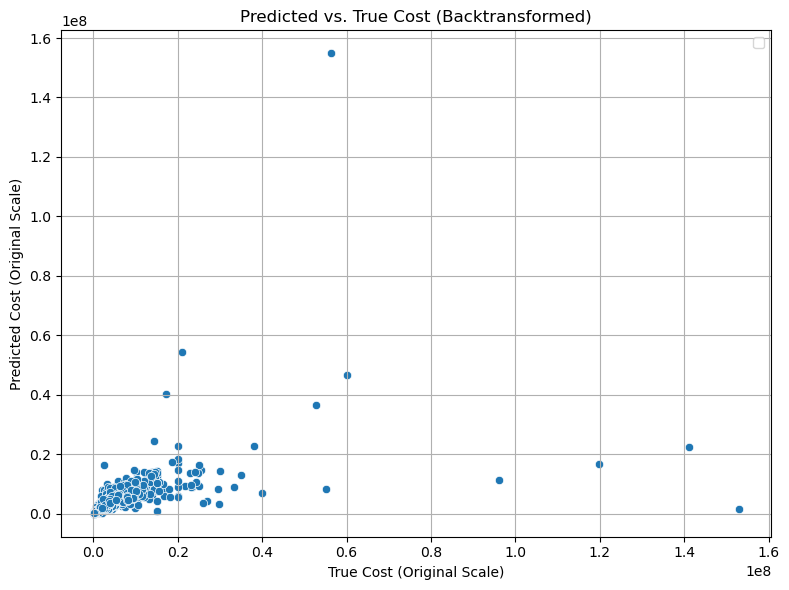

Correlation between True Cost and Predicted Cost (Original Scale): 0.56


In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original_scale) 
plt.xlabel("True Cost (Original Scale)")
plt.ylabel("Predicted Cost (Original Scale)")
plt.title("Predicted vs. True Cost (Backtransformed)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation on the backtransformed scale
correlation_original = np.corrcoef(y_test_original, y_pred_original_scale)[0, 1]
print(f"Correlation between True Cost and Predicted Cost (Original Scale): {correlation_original:.2f}")


--- Feature Importance ---
                                    Feature  Importance
0                  num__project_length_days        0.64
1              num__number_of_organizations        0.14
139             cat__legalBasis_HORIZON.3.1        0.09
131             cat__legalBasis_HORIZON.1.2        0.06
179  cat__fundingScheme_HORIZON-TMA-MSCA-SE        0.02
..                                      ...         ...
112                  num__impact_historical        0.00
205     cat__scientific_domain_confidential        0.00
116                   num__impact_political        0.00
183       cat__fundingScheme_unknown scheme        0.00
148              cat__fundingScheme_ERC-POC       -0.00

[257 rows x 2 columns]


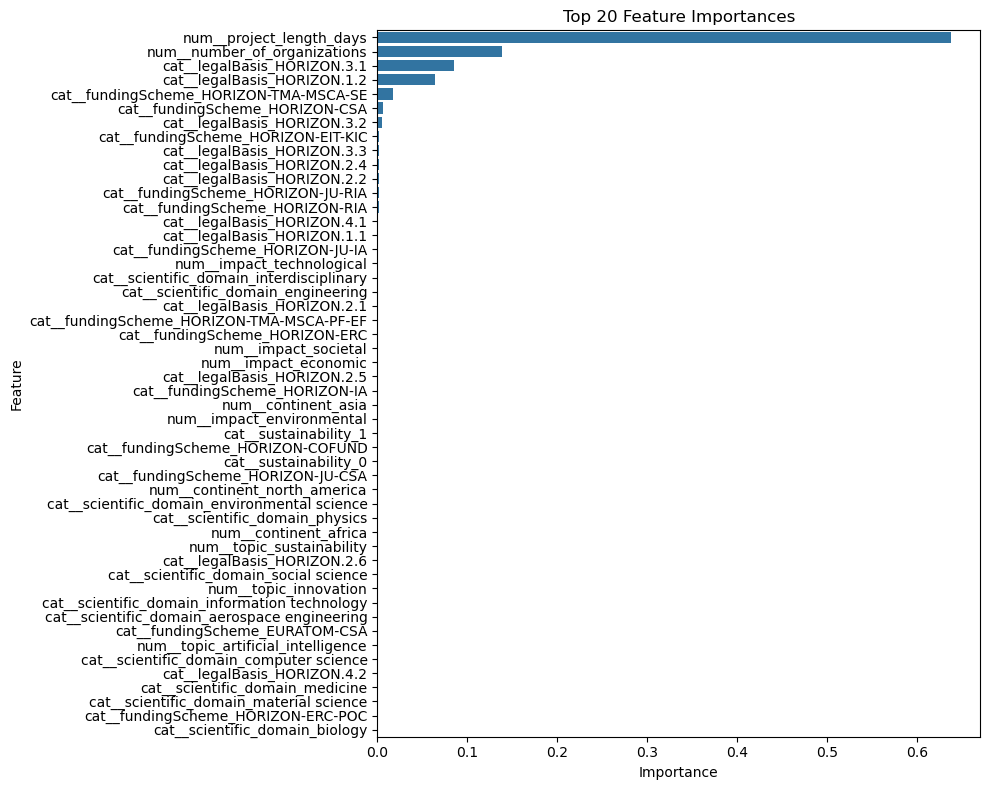

In [93]:
# --- Feature Importance Analysis ---
print("\n--- Feature Importance ---")

# 1. Get the trained regressor from the pipeline
trained_regressor = pipeline.named_steps['regressor']

# 2. Get the feature importances
importances = trained_regressor.feature_importances_

# 3. Get the feature names after preprocessing
# This requires inspecting the ColumnTransformer's output features
preprocessor = pipeline.named_steps['preprocessor']

# Get names of numerical features (these remain the same after StandardScaler)
num_features_out = numerical_features

# Get names of one-hot encoded categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names in the order they are presented to the regressor
all_feature_names = list(preprocessor.get_feature_names_out())


# Create a Series for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df) # Print top 10 most important features

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [94]:
# Bad performance, try outlier removal method based on IQR
# min>10 and max higher than 20. Given these treshold only the very big outliers are removed (no small ones, which is good)
# Only 7 are removed, so not a lot of outliers using this method on the log-transformed data
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["log_ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["log_ecMaxContribution"], 0.25) - 1.5*iqr 
upper_treshold = np.quantile(fulldf["log_ecMaxContribution"], 0.75) + 1.5*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["log_ecMaxContribution"]<lower_treshold) | (fulldf["log_ecMaxContribution"] > upper_treshold)]
df_no_outliers = fulldf[((fulldf["log_ecMaxContribution"]>lower_treshold) & (fulldf["log_ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

(15338, 135)
Lower treshold: 8.2867793132867, Upper treshold: 18.89052689997179
Remaining rows after outlier removal: 15331


In [95]:
fulldf["ecMaxContribution"].describe()

count       15338.00
mean      2851686.37
std       8314247.50
min         46594.00
25%        211754.88
50%       1808235.50
75%       2999996.12
max     549442000.00
Name: ecMaxContribution, dtype: float64

In [96]:
df_no_outliers["ecMaxContribution"].describe()

count       15331.00
mean      2725389.87
std       4992293.30
min         46594.00
25%        211754.88
50%       1805636.14
75%       2999990.62
max     153000000.00
Name: ecMaxContribution, dtype: float64

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib # To save/load your model and transformers

# Assuming fulldf is already defined and loaded
# Make sure 'ecMaxContribution' and 'log_ecMaxContribution' are columns in fulldf

# Separate features (X) and log-transformed target (y_log)
X = df_no_outliers.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y_log = df_no_outliers["log_ecMaxContribution"] # y is on the log scale
y_original = df_no_outliers["ecMaxContribution"] # Keep original for backtransformation evaluation

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability']
numerical_features = ['project_length_days', 'number_of_organizations'] + topic_columns + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Model Selection and Training (Random Forest as an example)
model = RandomForestRegressor(random_state=42)

# Create a pipeline to combine preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

# --- CORRECTED SPLITTING ---
# Split X, y_log, and y_original all at once to ensure perfect alignment
X_train, X_test, y_train_log, y_test_log, y_train_original, y_test_original = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42
)
# --- END CORRECTED SPLITTING ---

# Train the model (using log-transformed y)
pipeline.fit(X_train, y_train_log)

# Model Evaluation on LOG scale
y_pred_log = pipeline.predict(X_test)

mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("--- Evaluation on LOG Scale ---")
print(f'Mean Squared Error (Log): {mse_log:.4f}')
print(f'Root Mean Squared Error (Log): {rmse_log:.4f}')
print(f'R-squared (Log): {r2_log:.4f}')

# --- Backtransform predictions to original scale ---
y_pred_original_scale = np.exp(y_pred_log) # Using np.exp() for inverse log transformation

# Model Evaluation on ORIGINAL scale
mse_original = mean_squared_error(y_test_original, y_pred_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original_scale)
mae_original = mean_absolute_error(y_test_original, y_pred_original_scale) # MAE is often more interpretable on backtransformed scale

print("\n--- Evaluation on ORIGINAL Scale (Backtransformed) ---")
print(f'Mean Squared Error (Original): {mse_original:.2f}')
print(f'Root Mean Squared Error (Original): {rmse_original:.2f}')
print(f'Mean Absolute Error (Original): {mae_original:.2f}') # Consider MAE as well
print(f'R-squared (Original): {r2_original:.2f}')


# --- Save the trained components ---
joblib.dump(pipeline, 'prediction_pipeline.joblib')
# Assuming mlb_topics, mlb_impact, mlb_continents, infrequent_topics, topic_columns, continents_columns are defined
# and loaded from your previous script context. If they are used for feature creation, ensure they are passed along.
# joblib.dump(mlb_topics, 'mlb_topics.joblib')
# joblib.dump(mlb_impact, 'mlb_impact.joblib')
# joblib.dump(mlb_continents, 'mlb_continents.joblib')
# joblib.dump(infrequent_topics, 'infrequent_topics.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib') # Save feature order
print("\nModel components saved successfully!")

# --- END OF TRAINING & SAVING SCRIPT ---

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


--- Evaluation on LOG Scale ---
Mean Squared Error (Log): 0.0858
Root Mean Squared Error (Log): 0.2929
R-squared (Log): 0.9578

--- Evaluation on ORIGINAL Scale (Backtransformed) ---
Mean Squared Error (Original): 9905920762475.71
Root Mean Squared Error (Original): 3147367.27
Mean Absolute Error (Original): 693388.66
R-squared (Original): 0.52

Model components saved successfully!


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\1957497103.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


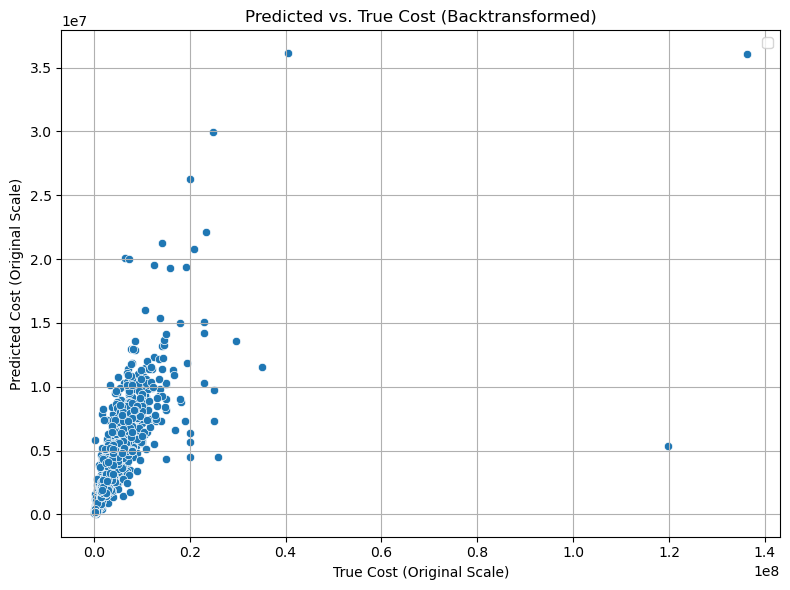

Correlation between True Cost and Predicted Cost (Original Scale): 0.73


In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original_scale) 
plt.xlabel("True Cost (Original Scale)")
plt.ylabel("Predicted Cost (Original Scale)")
plt.title("Predicted vs. True Cost (Backtransformed)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation on the backtransformed scale
correlation_original = np.corrcoef(y_test_original, y_pred_original_scale)[0, 1]
print(f"Correlation between True Cost and Predicted Cost (Original Scale): {correlation_original:.2f}")

In [99]:
# This is much more abrupt, leaving out 1205 projects
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["ecMaxContribution"], 0.25) - 1.5*iqr 
upper_treshold = np.quantile(fulldf["ecMaxContribution"], 0.75) + 1.5*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["ecMaxContribution"]<lower_treshold) | (fulldf["ecMaxContribution"] > upper_treshold)]
df_no_outliers2 = fulldf[((fulldf["ecMaxContribution"]>lower_treshold) & (fulldf["ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers2)}")

(15338, 135)
Lower treshold: -3970606.9875000003, Upper treshold: 7182357.9925
Remaining rows after outlier removal: 14133


In [100]:
fulldf["ecMaxContribution"].describe()

count       15338.00
mean      2851686.37
std       8314247.50
min         46594.00
25%        211754.88
50%       1808235.50
75%       2999996.12
max     549442000.00
Name: ecMaxContribution, dtype: float64

In [101]:
df_no_outliers2["ecMaxContribution"].describe()

count     14133.00
mean    1849908.66
std     1716306.32
min       46594.00
25%      203464.32
50%     1500000.00
75%     2533216.00
max     7168901.00
Name: ecMaxContribution, dtype: float64

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib # To save/load your model and transformers

# Assuming fulldf is already defined and loaded
# Make sure 'ecMaxContribution' and 'log_ecMaxContribution' are columns in fulldf

# Separate features (X) and log-transformed target (y_log)
X = df_no_outliers2.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y_log = df_no_outliers2["log_ecMaxContribution"] # y is on the log scale
y_original = df_no_outliers2["ecMaxContribution"] # Keep original for backtransformation evaluation

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability']
numerical_features = ['project_length_days', 'number_of_organizations'] + topic_columns + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Model Selection and Training (Random Forest as an example)
model = RandomForestRegressor(random_state=42)

# Create a pipeline to combine preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

# --- CORRECTED SPLITTING ---
# Split X, y_log, and y_original all at once to ensure perfect alignment
X_train, X_test, y_train_log, y_test_log, y_train_original, y_test_original = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42
)
# --- END CORRECTED SPLITTING ---

# Train the model (using log-transformed y)
pipeline.fit(X_train, y_train_log)

# Model Evaluation on LOG scale
y_pred_log = pipeline.predict(X_test)

mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("--- Evaluation on LOG Scale ---")
print(f'Mean Squared Error (Log): {mse_log:.4f}')
print(f'Root Mean Squared Error (Log): {rmse_log:.4f}')
print(f'R-squared (Log): {r2_log:.4f}')

# --- Backtransform predictions to original scale ---
y_pred_original_scale = np.exp(y_pred_log) # Using np.exp() for inverse log transformation

# Model Evaluation on ORIGINAL scale
mse_original = mean_squared_error(y_test_original, y_pred_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original_scale)
mae_original = mean_absolute_error(y_test_original, y_pred_original_scale) # MAE is often more interpretable on backtransformed scale

print("\n--- Evaluation on ORIGINAL Scale (Backtransformed) ---")
print(f'Mean Squared Error (Original): {mse_original:.2f}')
print(f'Root Mean Squared Error (Original): {rmse_original:.2f}')
print(f'Mean Absolute Error (Original): {mae_original:.2f}') # Consider MAE as well
print(f'R-squared (Original): {r2_original:.2f}')


# --- Save the trained components ---
joblib.dump(pipeline, 'prediction_pipeline.joblib')
# Assuming mlb_topics, mlb_impact, mlb_continents, infrequent_topics, topic_columns, continents_columns are defined
# and loaded from your previous script context. If they are used for feature creation, ensure they are passed along.
# joblib.dump(mlb_topics, 'mlb_topics.joblib')
# joblib.dump(mlb_impact, 'mlb_impact.joblib')
# joblib.dump(mlb_continents, 'mlb_continents.joblib')
# joblib.dump(infrequent_topics, 'infrequent_topics.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib') # Save feature order
print("\nModel components saved successfully!")

# --- END OF TRAINING & SAVING SCRIPT ---

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


--- Evaluation on LOG Scale ---
Mean Squared Error (Log): 0.0636
Root Mean Squared Error (Log): 0.2521
R-squared (Log): 0.9632

--- Evaluation on ORIGINAL Scale (Backtransformed) ---
Mean Squared Error (Original): 403176722728.13
Root Mean Squared Error (Original): 634961.99
Mean Absolute Error (Original): 367094.83
R-squared (Original): 0.86

Model components saved successfully!


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


C:\Users\lieve\AppData\Local\Temp\ipykernel_25980\1957497103.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


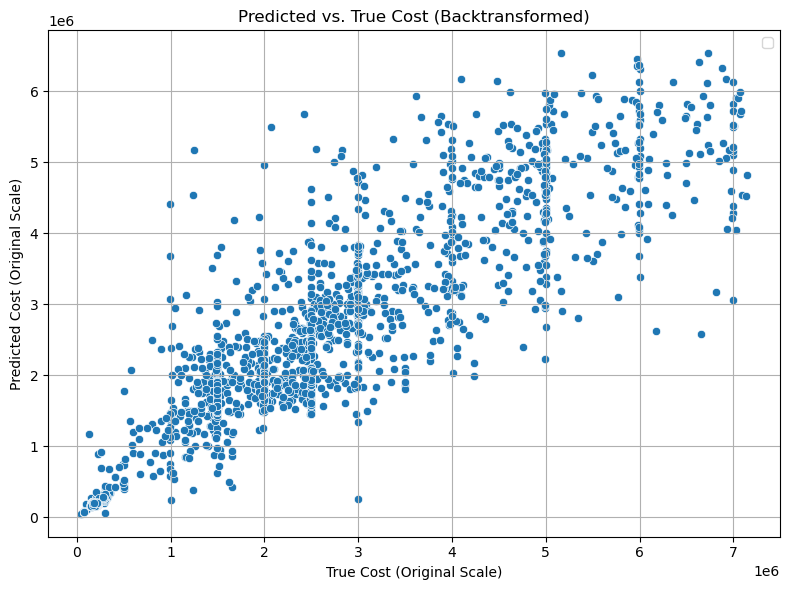

Correlation between True Cost and Predicted Cost (Original Scale): 0.93


In [103]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original_scale) 
plt.xlabel("True Cost (Original Scale)")
plt.ylabel("Predicted Cost (Original Scale)")
plt.title("Predicted vs. True Cost (Backtransformed)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation on the backtransformed scale
correlation_original = np.corrcoef(y_test_original, y_pred_original_scale)[0, 1]
print(f"Correlation between True Cost and Predicted Cost (Original Scale): {correlation_original:.2f}")

In [104]:
# Orginal data without outliers, not log-transformed
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib # To save/load your model and transformers


X = df_no_outliers2.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y = df_no_outliers2["ecMaxContribution"]

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability']
numerical_features = ['project_length_days', 'number_of_organizations'] + topic_columns + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Model Selection and Training (Random Forest as an example)
model = RandomForestRegressor(random_state=42)

# Create a pipeline to combine preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


# --- Save the trained components ---
joblib.dump(pipeline, 'prediction_pipeline.joblib')
joblib.dump(mlb_topics, 'mlb_topics.joblib')
joblib.dump(mlb_impact, 'mlb_impact.joblib')
joblib.dump(mlb_continents, 'mlb_continents.joblib')
joblib.dump(infrequent_topics, 'infrequent_topics.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib') # Save feature order
print("\nModel components saved successfully!")

# --- END OF TRAINING & SAVING SCRIPT ---

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Mean Squared Error: 405237865864.23
Root Mean Squared Error: 636582.96
Mean Absolute Error: 368245.13
R-squared: 0.86

Model components saved successfully!


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


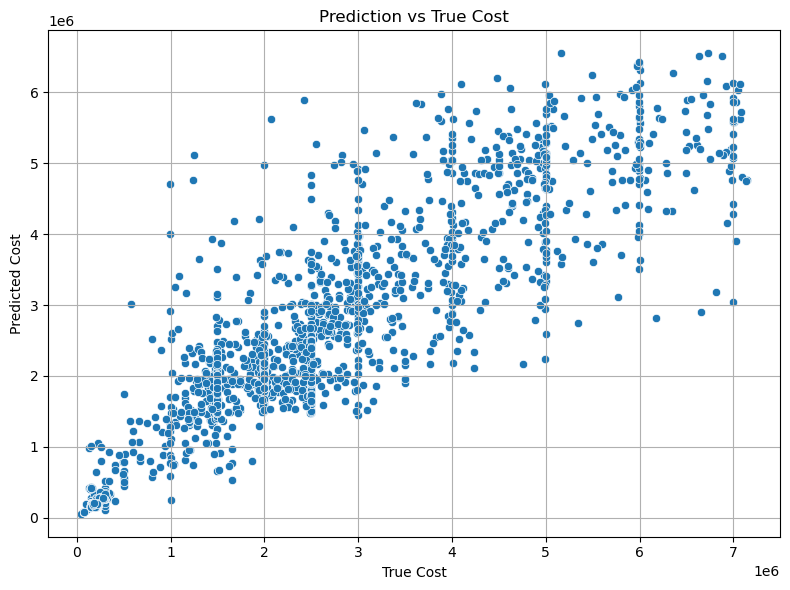

Correlation between True Cost and Predicted Cost: 0.93


In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")


--- Feature Importance ---
                                 Feature  Importance
1           num__number_of_organizations        0.53
131          cat__legalBasis_HORIZON.1.2        0.14
0               num__project_length_days        0.14
157       cat__fundingScheme_HORIZON-CSA        0.02
139          cat__legalBasis_HORIZON.3.1        0.02
..                                   ...         ...
109     num__impact_fundamental_research        0.00
110          num__impact_global_security        0.00
148           cat__fundingScheme_ERC-POC        0.00
204  cat__scientific_domain_confidential        0.00
182    cat__fundingScheme_unknown scheme        0.00

[257 rows x 2 columns]


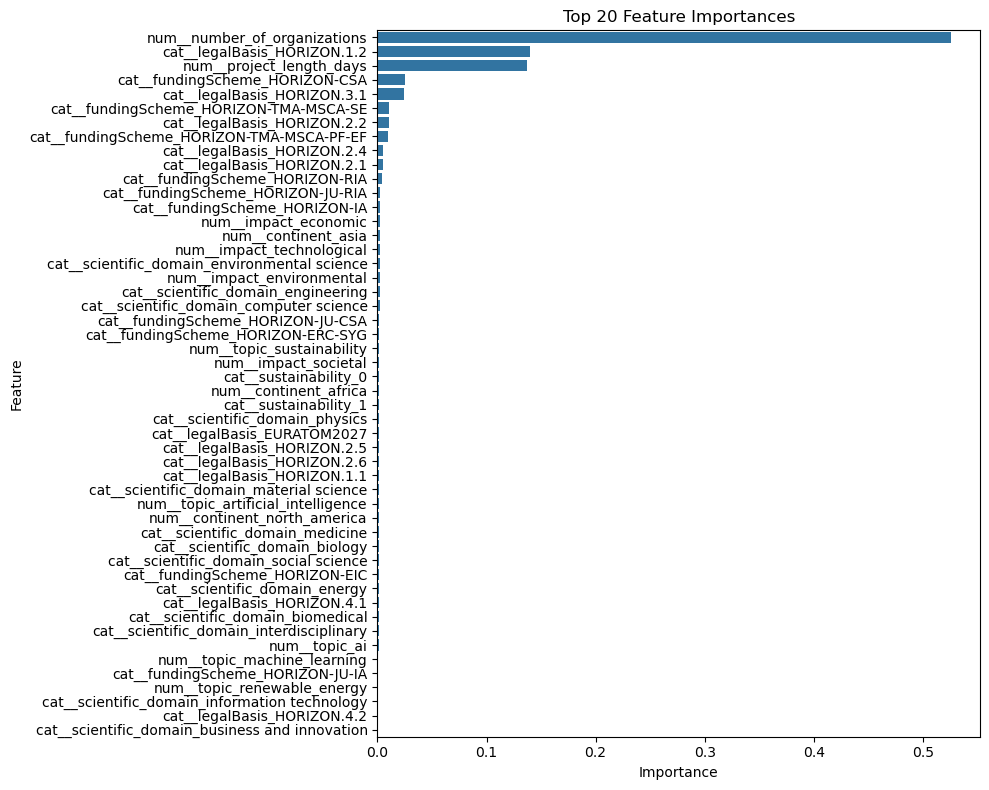

In [106]:
# --- Feature Importance Analysis ---
print("\n--- Feature Importance ---")

# 1. Get the trained regressor from the pipeline
trained_regressor = pipeline.named_steps['regressor']

# 2. Get the feature importances
importances = trained_regressor.feature_importances_

# 3. Get the feature names after preprocessing
# This requires inspecting the ColumnTransformer's output features
preprocessor = pipeline.named_steps['preprocessor']

# Get names of numerical features (these remain the same after StandardScaler)
num_features_out = numerical_features

# Get names of one-hot encoded categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names in the order they are presented to the regressor
all_feature_names = list(preprocessor.get_feature_names_out())


# Create a Series for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df) # Print top 10 most important features

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

feature_importance_df.to_csv("feature_importance.csv", index=False)

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib
import pandas as pd # Import pandas for DataFrame operations

X = df_no_outliers2.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y = df_no_outliers2["ecMaxContribution"]

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability']
numerical_features = ['project_length_days', 'number_of_organizations'] + topic_columns + impact_columns + continents_columns

# --- Store original counts ---
original_num_features_count = len(numerical_features)
original_cat_features_count = len(categorical_features)
original_total_features_count = original_num_features_count + original_cat_features_count
print(f"Original number of numerical features: {original_num_features_count}")
print(f"Original number of categorical features: {original_cat_features_count}")
print(f"Original total number of features: {original_total_features_count}")


# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Model Selection and Training
model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the initial model (this needs to be done to get feature importances)
pipeline.fit(X_train, y_train)

# --- Feature Importance Analysis ---
# Access the trained regressor from the pipeline
rf_model = pipeline.named_steps['regressor']
feature_importances = rf_model.feature_importances_

# Get feature names from the preprocessor
# For OneHotEncoder, get_feature_names_out() includes transformed names
# For StandardScaler, numerical features remain the same
preprocessed_feature_names = []

# Get numerical feature names
preprocessed_feature_names.extend(numerical_features)

# Get one-hot encoded categorical feature names
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names.extend(ohe_feature_names)

# If you have 'remainder=passthrough', add those column names too.
# This assumes that 'remainder' columns were not dropped and are in original X
passthrough_cols = [col for col in X_train.columns if col not in numerical_features and col not in categorical_features]
preprocessed_feature_names.extend(passthrough_cols)


# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': preprocessed_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances ---")
print(feature_importance_df)

# --- Strategy for Removing Less Important Predictors ---

# You can choose a threshold (e.g., remove features with importance < 0.005)
# or select the top N features.

# Option 1: Remove features below a certain importance threshold
threshold = 0.0001 # Example threshold
selected_features_by_threshold = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(f"\n--- Features selected with importance > {threshold}: ---")
print(selected_features_by_threshold)

# Option 2: Select the top N most important features
top_n = 20 # Example: select top 20 features
selected_features_top_n = feature_importance_df.head(top_n)['Feature'].tolist()
print(f"\n--- Top {top_n} features: ---")
print(selected_features_top_n)

# --- Rebuild the model with selected features (Example using Option 1) ---

final_selected_features = selected_features_by_threshold # Or selected_features_top_n

# Find which original numerical features are among the selected
new_numerical_features = [f for f in numerical_features if f in final_selected_features]

# Find which original categorical features need to be kept (if any of their OHE columns are selected)
new_categorical_features = []
for cat_feat in categorical_features:
    # Check if any of the one-hot encoded sub-features derived from this categorical feature are in final_selected_features
    ohe_col_names_for_cat_feat = [f"{cat_feat}_{val}" for val in X_train[cat_feat].unique()] # Approximate OHE column names
    if any(ohe_col_name in final_selected_features for ohe_col_name in ohe_col_names_for_cat_feat) or cat_feat in final_selected_features:
        new_categorical_features.append(cat_feat)

# --- Print counts of selected features ---
selected_num_features_count = len(new_numerical_features)
selected_cat_features_count = len(new_categorical_features)
selected_total_features_count = selected_num_features_count + selected_cat_features_count

print(f"\n--- Feature Selection Summary ---")
print(f"Original numerical features: {original_num_features_count}")
print(f"Selected numerical features: {selected_num_features_count}")
print(f"Original categorical features: {original_cat_features_count}")
print(f"Selected categorical features: {selected_cat_features_count}")
print(f"Original total features: {original_total_features_count}")
print(f"Selected total features: {selected_total_features_count}")


# --- Now, build and train a new pipeline with the selected features ---
print("\n--- Training model with selected features ---")

# Re-define the preprocessor with the new feature lists
preprocessor_selected = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), new_numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), new_categorical_features)
    ],
    remainder='passthrough' # Or 'drop' if you want to strictly drop unselected columns
)

pipeline_selected = Pipeline(steps=[('preprocessor', preprocessor_selected), ('regressor', RandomForestRegressor(random_state=42))])

# Train the new pipeline
pipeline_selected.fit(X_train, y_train)

# Evaluate the new pipeline
y_pred_selected = pipeline_selected.predict(X_test)

mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)

print(f'\nMean Squared Error (Selected Features): {mse_selected:.2f}')
print(f'Root Mean Squared Error (Selected Features): {rmse_selected:.2f}')
print(f'Mean Absolute Error (Selected Features): {mae_selected:.2f}')
print(f'R-squared (Selected Features): {r2_selected:.2f}')

# --- Compare with Original Model ---
print("\n--- Original Model Performance ---")
# To print original model performance, you'd need to run the initial prediction and metrics here.
# Assuming 'mse', 'rmse', 'mae', 'r2' are available from an earlier calculation of the 'pipeline' model
# For a full comparison, you'd need to run:
y_pred_original = pipeline.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test, y_pred_original)
mae_original = mean_absolute_error(y_test, y_pred_original)

print(f'Mean Squared Error (Original): {mse_original:.2f}')
print(f'Root Mean Squared Error (Original): {rmse_original:.2f}')
print(f'Mean Absolute Error (Original): {mae_original:.2f}')
print(f'R-squared (Original): {r2_original:.2f}')

# --- Save the refined pipeline ---
joblib.dump(pipeline, 'prediction_pipeline.joblib')
joblib.dump(mlb_topics, 'mlb_topics.joblib')
joblib.dump(mlb_impact, 'mlb_impact.joblib')
joblib.dump(mlb_continents, 'mlb_continents.joblib')
joblib.dump(infrequent_topics, 'infrequent_topics.joblib')
joblib.dump(pipeline_selected, 'prediction_pipeline_refined.joblib')

# Save the feature_columns for the app.py
# This should be the columns from the X_train used by pipeline_selected
joblib.dump(X_train[new_numerical_features + new_categorical_features].columns.tolist(), 'feature_columns.joblib')

print("\nRefined model components saved successfully!")

Original number of numerical features: 129
Original number of categorical features: 4
Original total number of features: 133


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



--- Feature Importances ---
                            Feature  Importance
1           number_of_organizations        0.53
131          legalBasis_HORIZON.1.2        0.14
0               project_length_days        0.14
157       fundingScheme_HORIZON-CSA        0.02
139          legalBasis_HORIZON.3.1        0.02
..                              ...         ...
109     impact_fundamental_research        0.00
110          impact_global_security        0.00
148           fundingScheme_ERC-POC        0.00
204  scientific_domain_confidential        0.00
182    fundingScheme_unknown scheme        0.00

[257 rows x 2 columns]

--- Features selected with importance > 0.0001: ---
['number_of_organizations', 'legalBasis_HORIZON.1.2', 'project_length_days', 'fundingScheme_HORIZON-CSA', 'legalBasis_HORIZON.3.1', 'fundingScheme_HORIZON-TMA-MSCA-SE', 'legalBasis_HORIZON.2.2', 'fundingScheme_HORIZON-TMA-MSCA-PF-EF', 'legalBasis_HORIZON.2.4', 'legalBasis_HORIZON.2.1', 'fundingScheme_HORIZON-RIA', 'f

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Mean Squared Error (Selected Features): 405544490263.27
Root Mean Squared Error (Selected Features): 636823.75
Mean Absolute Error (Selected Features): 368021.41
R-squared (Selected Features): 0.86

--- Original Model Performance ---
Mean Squared Error (Original): 405237865864.23
Root Mean Squared Error (Original): 636582.96
Mean Absolute Error (Original): 368245.13
R-squared (Original): 0.86

Refined model components saved successfully!


In [113]:
# Print removed features
print("\n--- Original Features Removed from the Model ---")

# Features that were originally numerical but are NOT in the new numerical features
removed_original_numerical = [f for f in numerical_features if f not in new_numerical_features]

# Features that were originally categorical but are NOT in the new categorical features
removed_original_categorical = [f for f in categorical_features if f not in new_categorical_features]


if removed_original_numerical or removed_original_categorical:
    print(f"Total original numerical features removed: {len(removed_original_numerical)}")
    if removed_original_numerical:
        for feature in removed_original_numerical:
            print(f"- Numerical: {feature}")

    print(f"\nTotal original categorical features removed: {len(removed_original_categorical)}")
    if removed_original_categorical:
        for feature in removed_original_categorical:
            print(f"- Categorical: {feature}")
else:
    print("No original features (numerical or categorical) were entirely removed.")


--- Original Features Removed from the Model ---
Total original numerical features removed: 33
- Numerical: topic_agroecology
- Numerical: topic_aquaculture
- Numerical: topic_aviation
- Numerical: topic_big_data
- Numerical: topic_clinical_trials
- Numerical: topic_data_sharing
- Numerical: topic_democracy
- Numerical: topic_digital_tools
- Numerical: topic_genetics
- Numerical: topic_healthcare_innovation
- Numerical: topic_innovation_ecosystems
- Numerical: topic_personalized_medicine
- Numerical: topic_research_and_innovation
- Numerical: topic_research_infrastructures
- Numerical: topic_urban_planning
- Numerical: impact_applied
- Numerical: impact_biological
- Numerical: impact_business
- Numerical: impact_clinical
- Numerical: impact_cultural
- Numerical: impact_educational
- Numerical: impact_ethical
- Numerical: impact_fundamental_research
- Numerical: impact_global_security
- Numerical: impact_historical
- Numerical: impact_linguistic
- Numerical: impact_medical
- Numerical:


--- Feature Importance ---
                                 Feature  Importance
1           num__number_of_organizations        0.53
131          cat__legalBasis_HORIZON.1.2        0.14
0               num__project_length_days        0.14
157       cat__fundingScheme_HORIZON-CSA        0.02
139          cat__legalBasis_HORIZON.3.1        0.02
..                                   ...         ...
109     num__impact_fundamental_research        0.00
110          num__impact_global_security        0.00
148           cat__fundingScheme_ERC-POC        0.00
204  cat__scientific_domain_confidential        0.00
182    cat__fundingScheme_unknown scheme        0.00

[257 rows x 2 columns]


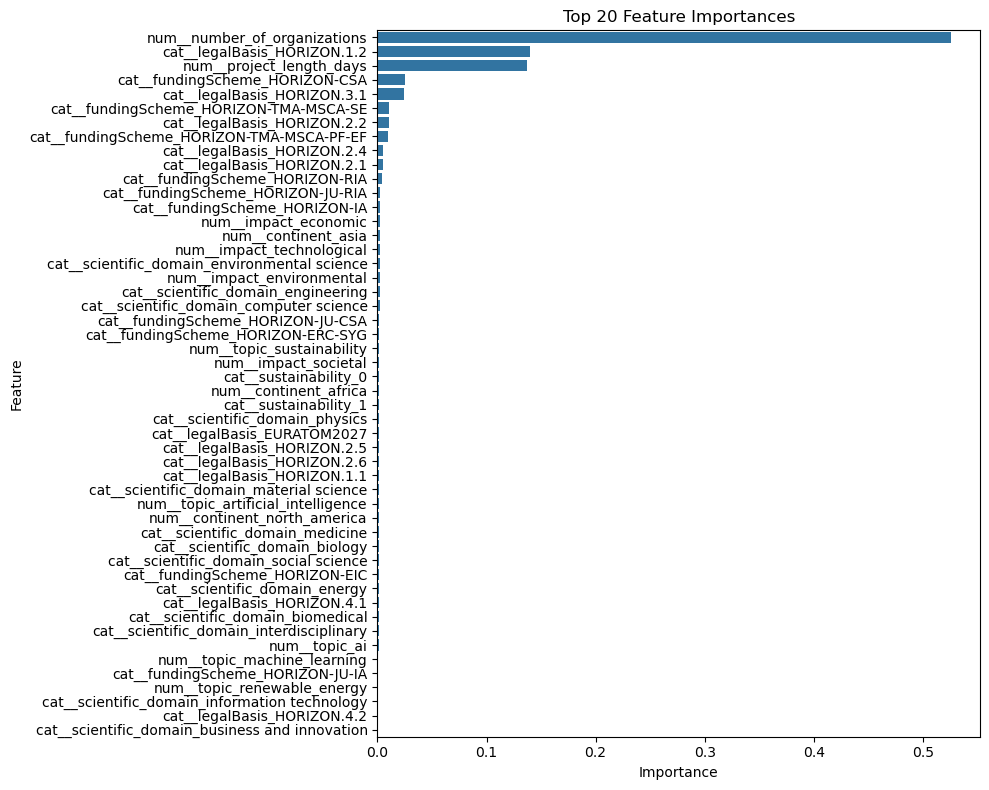

In [111]:
# --- Feature Importance Analysis ---
print("\n--- Feature Importance ---")

# 1. Get the trained regressor from the pipeline
trained_regressor = pipeline.named_steps['regressor']

# 2. Get the feature importances
importances = trained_regressor.feature_importances_

# 3. Get the feature names after preprocessing
# This requires inspecting the ColumnTransformer's output features
preprocessor = pipeline.named_steps['preprocessor']

# Get names of numerical features (these remain the same after StandardScaler)
num_features_out = numerical_features

# Get names of one-hot encoded categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names in the order they are presented to the regressor
all_feature_names = list(preprocessor.get_feature_names_out())


# Create a Series for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df) # Print top 10 most important features

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

feature_importance_df.to_csv("feature_importance.csv", index=False)

## Removing the variables causes problems in the app, since they are part of a "set". I'll just keep everything in, since there is no full "set" that got removed.

In [115]:
# Orginal data without outliers, not log-transformed
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib # To save/load your model and transformers


X = df_no_outliers2.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y = df_no_outliers2["ecMaxContribution"]

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability']
numerical_features = ['project_length_days', 'number_of_organizations'] + topic_columns + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Model Selection and Training (Random Forest as an example)
model = RandomForestRegressor(random_state=42)

# Create a pipeline to combine preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


# --- Save the trained components ---
joblib.dump(pipeline, 'prediction_pipeline.joblib')
joblib.dump(mlb_topics, 'mlb_topics.joblib')
joblib.dump(mlb_impact, 'mlb_impact.joblib')
joblib.dump(mlb_continents, 'mlb_continents.joblib')
joblib.dump(infrequent_topics, 'infrequent_topics.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib') # Save feature order
print("\nModel components saved successfully!")

# --- END OF TRAINING & SAVING SCRIPT ---

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Mean Squared Error: 405237865864.23
Root Mean Squared Error: 636582.96
Mean Absolute Error: 368245.13
R-squared: 0.86

Model components saved successfully!


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


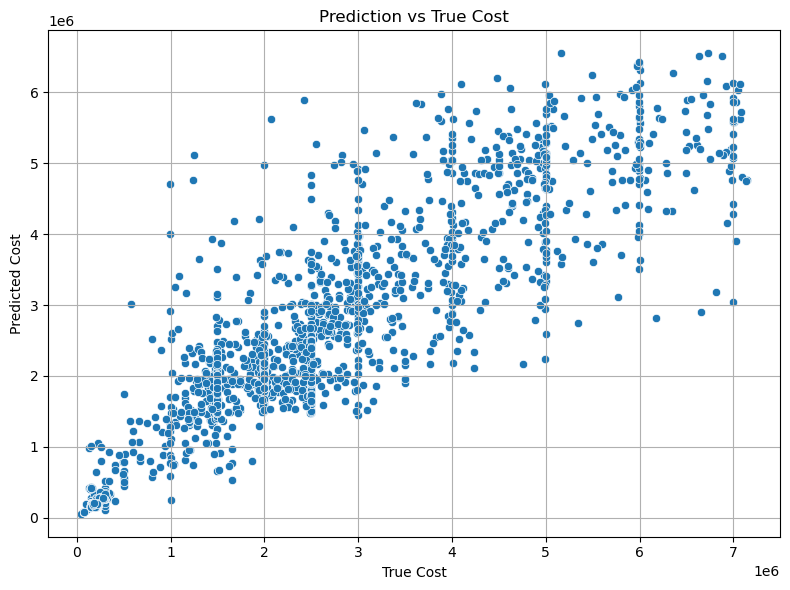

Correlation between True Cost and Predicted Cost: 0.93


In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")


--- Feature Importance ---
                                 Feature  Importance
1           num__number_of_organizations        0.53
131          cat__legalBasis_HORIZON.1.2        0.14
0               num__project_length_days        0.14
157       cat__fundingScheme_HORIZON-CSA        0.02
139          cat__legalBasis_HORIZON.3.1        0.02
..                                   ...         ...
109     num__impact_fundamental_research        0.00
110          num__impact_global_security        0.00
148           cat__fundingScheme_ERC-POC        0.00
204  cat__scientific_domain_confidential        0.00
182    cat__fundingScheme_unknown scheme        0.00

[257 rows x 2 columns]


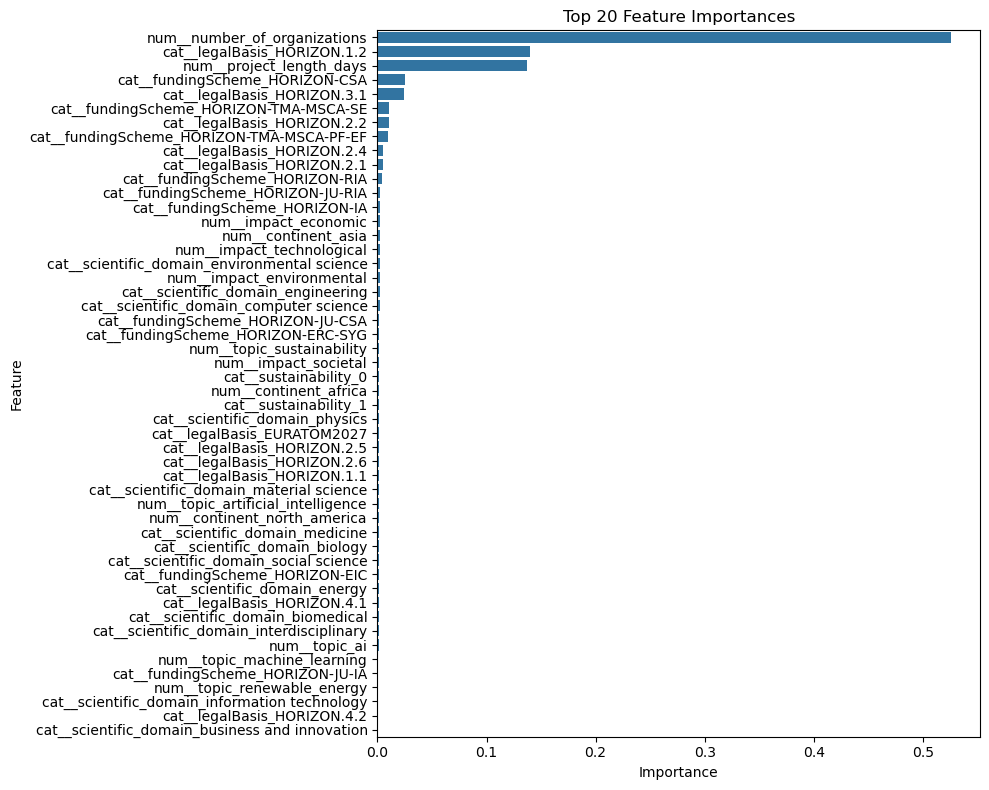

In [117]:
# --- Feature Importance Analysis ---
print("\n--- Feature Importance ---")

# 1. Get the trained regressor from the pipeline
trained_regressor = pipeline.named_steps['regressor']

# 2. Get the feature importances
importances = trained_regressor.feature_importances_

# 3. Get the feature names after preprocessing
# This requires inspecting the ColumnTransformer's output features
preprocessor = pipeline.named_steps['preprocessor']

# Get names of numerical features (these remain the same after StandardScaler)
num_features_out = numerical_features

# Get names of one-hot encoded categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names in the order they are presented to the regressor
all_feature_names = list(preprocessor.get_feature_names_out())


# Create a Series for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df) # Print top 10 most important features

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

feature_importance_df.to_csv("feature_importance.csv", index=False)